# Regression model for real estate data

#### importing libraries-reading the data

In [1]:
# Let's import some useful libraries 
import pandas as pd
import numpy as np
from IPython.display import display
import matplotlib.pyplot as plt
import seaborn as sns 
%matplotlib inline
import statistics as stat
import scipy.stats as stats
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
import statsmodels.api as sm
from statsmodels.formula.api import ols
import warnings
warnings.filterwarnings('ignore')
from sklearn.preprocessing import MinMaxScaler 
from sklearn.preprocessing import StandardScaler
from scipy import stats
from sklearn.preprocessing import Normalizer
from sklearn.preprocessing import OneHotEncoder
from sklearn.neighbors import KNeighborsRegressor
from sklearn import neighbors

In [2]:
# import-read the file 'regression_data' into a pandas DataFrame and see its shape, it has 21597 rows and 21 columns
df = pd.read_excel('regression_data.xls')
df.shape

(21597, 21)

#### general info about the dataframe to understand better the data

In [3]:
# We are gonna display the head of the dataframe
display(df.head())

,id,date,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,...,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,price
0,7129300520,2014-10-13,3,1.00,1180,5650,1.0,0,0,3,...,1180,0,1955,0,98178,47.5112,-122.257,1340,5650,221900
1,6414100192,2014-12-09,3,2.25,2570,7242,2.0,0,0,3,...,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639,538000
2,5631500400,2015-02-25,2,1.00,770,10000,1.0,0,0,3,...,770,0,1933,0,98028,47.7379,-122.233,2720,8062,180000
3,2487200875,2014-12-09,4,3.00,1960,5000,1.0,0,0,5,...,1050,910,1965,0,98136,47.5208,-122.393,1360,5000,604000
4,1954400510,2015-02-18,3,2.00,1680,8080,1.0,0,0,3,...,1680,0,1987,0,98074,47.6168,-122.045,1800,7503,510000


In [4]:
# some general info about the dataframe
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   id             21597 non-null  int64         
 1   date           21597 non-null  datetime64[ns]
 2   bedrooms       21597 non-null  int64         
 3   bathrooms      21597 non-null  float64       
 4   sqft_living    21597 non-null  int64         
 5   sqft_lot       21597 non-null  int64         
 6   floors         21597 non-null  float64       
 7   waterfront     21597 non-null  int64         
 8   view           21597 non-null  int64         
 9   condition      21597 non-null  int64         
 10  grade          21597 non-null  int64         
 11  sqft_above     21597 non-null  int64         
 12  sqft_basement  21597 non-null  int64         
 13  yr_built       21597 non-null  int64         
 14  yr_renovated   21597 non-null  int64         
 15  zipcode        2159

In [5]:
# let's see the columns in a list to understand the features
# df.columns # or better
list(df.columns)

['id',
 'date',
 'bedrooms',
 'bathrooms',
 'sqft_living',
 'sqft_lot',
 'floors',
 'waterfront',
 'view',
 'condition',
 'grade',
 'sqft_above',
 'sqft_basement',
 'yr_built',
 'yr_renovated',
 'zipcode',
 'lat',
 'long',
 'sqft_living15',
 'sqft_lot15',
 'price']

In [6]:
# Checking out the data types in a list
df.dtypes
# or #list(zip(df.columns,df.dtypes))

id                        int64
date             datetime64[ns]
bedrooms                  int64
bathrooms               float64
sqft_living               int64
sqft_lot                  int64
floors                  float64
waterfront                int64
view                      int64
condition                 int64
grade                     int64
sqft_above                int64
sqft_basement             int64
yr_built                  int64
yr_renovated              int64
zipcode                   int64
lat                     float64
long                    float64
sqft_living15             int64
sqft_lot15                int64
price                     int64
dtype: object

In [7]:
# Checking for the number of unique features in each column
df.nunique()

id               21420
date               372
bedrooms            12
bathrooms           29
sqft_living       1034
sqft_lot          9776
floors               6
waterfront           2
view                 5
condition            5
grade               11
sqft_above         942
sqft_basement      306
yr_built           116
yr_renovated        70
zipcode             70
lat               5033
long               751
sqft_living15      777
sqft_lot15        8682
price             3622
dtype: int64

#### check and deal with NaN values

In [8]:
df.isna().sum()
# there are no NaN values in the columns

id               0
date             0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
price            0
dtype: int64

In [9]:
# show the percentage of null values in a column
nan_df = pd.DataFrame(round(df.isna().sum()/len(df),4)*100)
nan_df

,0
id,0.0
date,0.0
bedrooms,0.0
bathrooms,0.0
sqft_living,0.0
sqft_lot,0.0
floors,0.0
waterfront,0.0
view,0.0
condition,0.0


#### EDA (Exploratory Data Analysis)

In [10]:
# looking for the quantity of each observation in every column-feature  
for col in df:
    print(df[col].value_counts(), '\n')
# we get some useful information like the most selled houses are the houses with 3 or 4 bedrooms
# we also got the same information by analyzing with SQL and tableau

795000620     3
8910500150    2
7409700215    2
1995200200    2
9211500620    2
             ..
3649100387    1
2767603649    1
1446403617    1
5602000275    1
1523300157    1
Name: id, Length: 21420, dtype: int64 

2014-06-23    142
2014-06-25    131
2014-06-26    131
2014-07-08    127
2015-04-27    126
             ... 
2014-11-02      1
2015-01-31      1
2015-05-24      1
2014-05-17      1
2014-07-27      1
Name: date, Length: 372, dtype: int64 

3     9824
4     6882
2     2760
5     1601
6      272
1      196
7       38
8       13
9        6
10       3
11       1
33       1
Name: bedrooms, dtype: int64 

2.50    5377
1.00    3851
1.75    3048
2.25    2047
2.00    1930
1.50    1445
2.75    1185
3.00     753
3.50     731
3.25     589
3.75     155
4.00     136
4.50     100
4.25      79
0.75      71
4.75      23
5.00      21
5.25      13
5.50      10
1.25       9
6.00       6
0.50       4
5.75       4
6.75       2
8.00       2
6.25       2
6.50       2
7.50       1
7.75       1
Name: 

In [11]:
# describe the dataframe
df.describe().T
# one element which will be useful is about the price, we can see that the 75 percentile is 645000 and the max 7700000
# our intuition says that we will have some extreme outliers

,count,mean,std,min,25%,50%,75%,max
id,21597.0,4.580474e+09,2.876736e+09,1.000102e+06,2.123049e+09,3.904930e+09,7.308900e+09,9.900000e+09
bedrooms,21597.0,3.373200e+00,9.262989e-01,1.000000e+00,3.000000e+00,3.000000e+00,4.000000e+00,3.300000e+01
bathrooms,21597.0,2.115826e+00,7.689843e-01,5.000000e-01,1.750000e+00,2.250000e+00,2.500000e+00,8.000000e+00
sqft_living,21597.0,2.080322e+03,9.181061e+02,3.700000e+02,1.430000e+03,1.910000e+03,2.550000e+03,1.354000e+04
sqft_lot,21597.0,1.509941e+04,4.141264e+04,5.200000e+02,5.040000e+03,7.618000e+03,1.068500e+04,1.651359e+06
floors,21597.0,1.494096e+00,5.396828e-01,1.000000e+00,1.000000e+00,1.500000e+00,2.000000e+00,3.500000e+00
waterfront,21597.0,7.547345e-03,8.654900e-02,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00
view,21597.0,2.342918e-01,7.663898e-01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,4.000000e+00
condition,21597.0,3.409825e+00,6.505456e-01,1.000000e+00,3.000000e+00,3.000000e+00,4.000000e+00,5.000000e+00
grade,21597.0,7.657915e+00,1.173200e+00,3.000000e+00,7.000000e+00,7.000000e+00,8.000000e+00,1.300000e+01


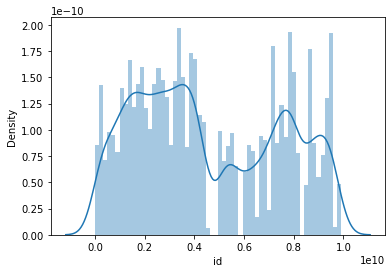

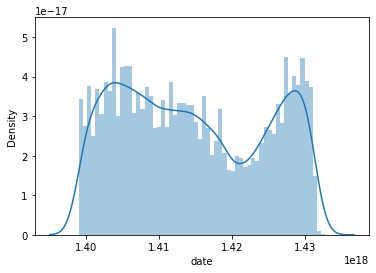

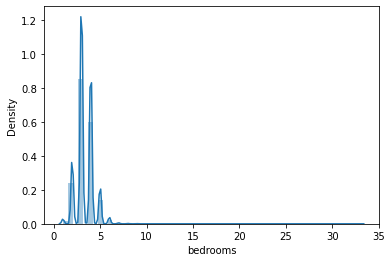

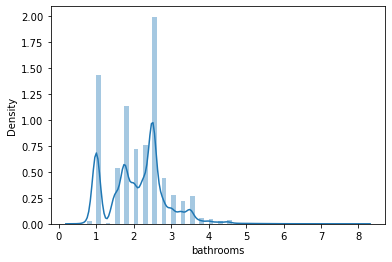

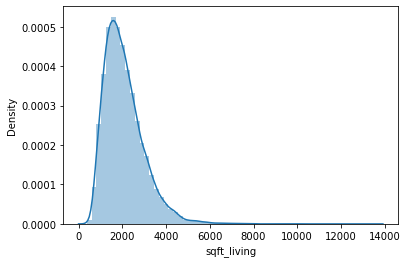

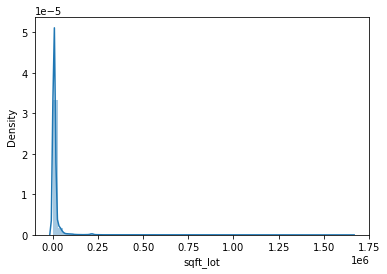

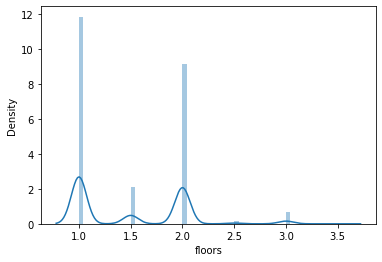

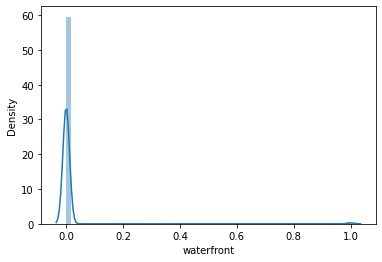

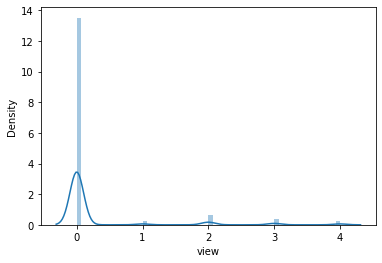

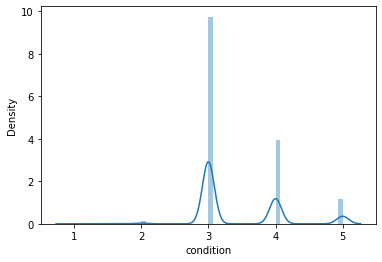

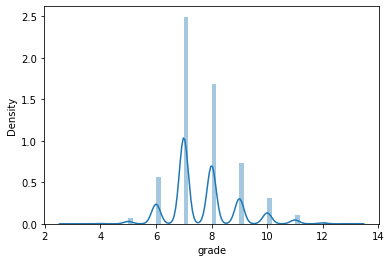

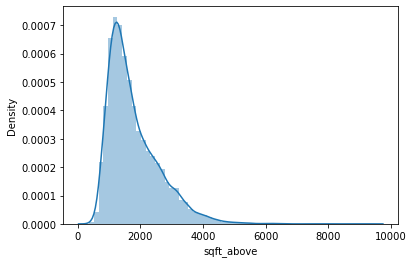

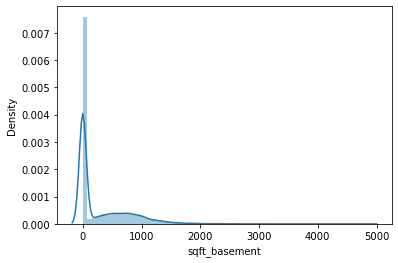

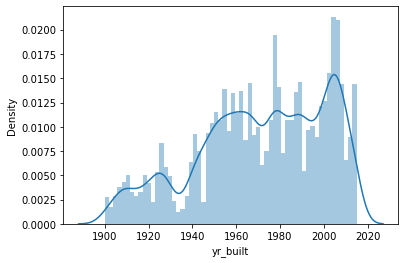

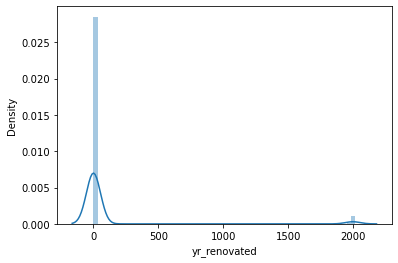

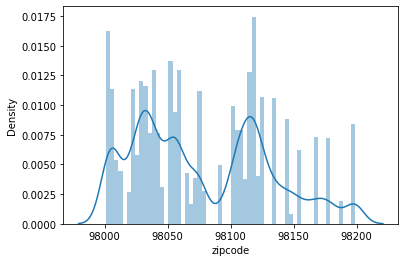

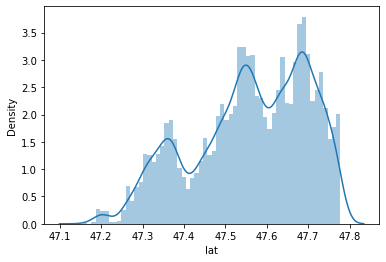

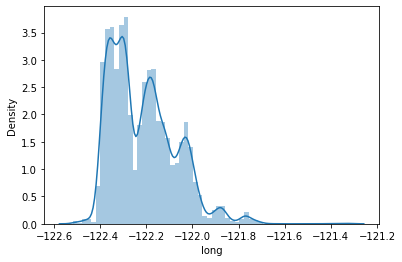

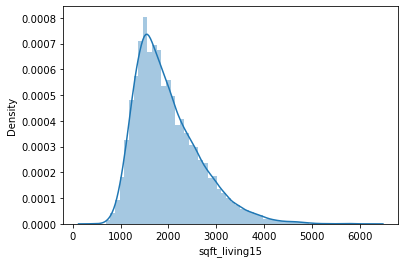

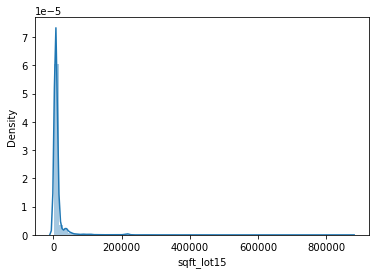

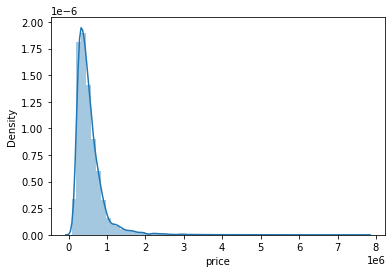

In [12]:
# distribution plots of the variables
for col in df:
    sns.distplot(df[col], bins=60)
    plt.show()
# some of the distributions are skewed, needed to normalize them

#### dealing with useless columns-converting column zipcode to categorical

In [13]:
# we will convert the variable-column 'id' to an index
df=df.set_index('id') 
df

,date,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,price
id,,,,,,,,,,,,,,,,,,,,
7129300520,2014-10-13,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650,221900
6414100192,2014-12-09,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639,538000
5631500400,2015-02-25,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062,180000
2487200875,2014-12-09,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000,604000
1954400510,2015-02-18,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503,510000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
263000018,2014-05-21,3,2.50,1530,1131,3.0,0,0,3,8,1530,0,2009,0,98103,47.6993,-122.346,1530,1509,360000
6600060120,2015-02-23,4,2.50,2310,5813,2.0,0,0,3,8,2310,0,2014,0,98146,47.5107,-122.362,1830,7200,400000
1523300141,2014-06-23,2,0.75,1020,1350,2.0,0,0,3,7,1020,0,2009,0,98144,47.5944,-122.299,1020,2007,402101


In [14]:
# checking the years that the houses were built, from the data
df['date_year']=df['date'].dt.year

In [15]:
# counting the observations per year
df.date_year.value_counts()

2014    14622
2015     6975
Name: date_year, dtype: int64

In [16]:
# We will drop the column 'date': the date the house was sold, as we have observations for only 2 years, it is a short period to
# get useful information with big differences in the prices.
df=df.drop('date', axis=1)
df.head(1)

,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,price,date_year
id,,,,,,,,,,,,,,,,,,,,
7129300520,3,1.0,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650,221900,2014


In [17]:
# We will also drop the columns 'lat' and 'long', we will not use the coordinates because we can get the same information
# (about the area) from the column zipcode
df=df.drop(['lat','long'], axis=1)
df.head(1)

,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,sqft_living15,sqft_lot15,price,date_year
id,,,,,,,,,,,,,,,,,,
7129300520,3,1.0,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,1340,5650,221900,2014


In [18]:
# the column's rows of zipcode are just a sequence of numbers, so we decided to convert it to categorical 
df_cat = df[['zipcode']]
df_cat

,zipcode
id,
7129300520,98178
6414100192,98125
5631500400,98028
2487200875,98136
1954400510,98074
...,...
263000018,98103
6600060120,98146
1523300141,98144


In [19]:
# we can count the quantity of the selled houses in each zipcode 
df['zipcode'].value_counts()
# we can notice that we have a lot of sales in some specific zipcodes-areas

98103    602
98038    589
98115    583
98052    574
98117    553
        ... 
98102    104
98010    100
98024     80
98148     57
98039     50
Name: zipcode, Length: 70, dtype: int64

#### playing with the data-finding cheap opportunities

In [20]:
# Let's find the top 10 biggest apartments
top10_biggest_houses = df[['price','bedrooms','bathrooms','floors','condition','grade','yr_built', 'yr_renovated', 'sqft_living15', 'sqft_lot15','zipcode']].nlargest(10, ['bedrooms']).set_index('zipcode')
top10_biggest_houses
# We have 3/10 apartments in the zipcode 98105

,price,bedrooms,bathrooms,floors,condition,grade,yr_built,yr_renovated,sqft_living15,sqft_lot15
zipcode,,,,,,,,,,
98103,640000,33,1.75,1.0,5,7,1947,0,1330,4700
98106,520000,11,3.00,2.0,3,7,1918,1999,1420,4960
98004,1150000,10,5.25,1.0,3,9,2008,0,2730,10400
98006,650000,10,2.00,2.0,4,7,1958,0,2040,11914
98105,660000,10,3.00,2.0,4,7,1913,0,1810,3745
98103,599999,9,4.50,2.5,3,7,1938,0,1460,6291
98102,700000,9,3.00,2.0,3,7,1908,0,1960,2450
98105,1280000,9,4.50,2.0,3,8,1915,2010,2510,5000
98144,450000,9,7.50,2.0,3,7,1996,0,1448,3866


In [21]:
# Let's check some opportunities of houses with good characteristics and low prices
good_houses_low_prices = df[(df['price'] < 500000) & (df['yr_built'] > 1980) & (df['condition'] > 2) & (df['grade'] > 9)]
good_houses_low_prices.sort_values(by=["price",'grade'], ascending=[True,False])
# most of the apartments are with 3-4 bedrooms, 2 bathrooms, 2 floors, condition 3, grade 10

,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,sqft_living15,sqft_lot15,price,date_year
id,,,,,,,,,,,,,,,,,,
8835800480,1,2.0,1780,188465,2.0,0,0,3,10,1780,0,2001,0,98045,1780,21094,316000,2015
2867300190,4,2.5,3753,7204,2.0,0,0,3,10,3336,417,2008,0,98023,3494,9375,363000,2014
7631800110,3,2.5,1980,17342,2.0,1,4,3,10,1580,400,1984,0,98166,2060,17313,380000,2014
821049123,4,2.5,2420,9147,2.0,0,0,3,10,2420,0,1998,0,98003,1400,7200,389000,2014
7298020240,4,2.5,2600,11951,2.0,0,0,3,10,2600,0,1988,0,98023,2820,12093,402500,2014
1196003428,3,2.5,3170,12750,2.0,0,0,3,10,2360,810,1995,0,98023,2970,13125,405000,2014
7298050110,4,2.5,3360,11637,2.0,0,0,3,11,3360,0,1990,0,98023,3530,11205,420000,2015
2085700050,4,2.5,2480,8626,2.0,0,0,3,10,2480,0,2001,0,98001,2990,9033,420000,2014
2122059216,4,2.5,2930,5973,2.0,0,0,3,10,2930,0,2008,0,98030,3038,7095,422000,2015


In [22]:
# Let's also check where we can find(zipcodes) these opportunities
good_houses_low_prices['zipcode'].value_counts()
# most of them are in the area with zipcode 98023

98023    11
98030     3
98042     3
98003     3
98001     2
98058     1
98199     1
98031     1
98092     1
98045     1
98038     1
98166     1
98119     1
Name: zipcode, dtype: int64

#### separating in numerical and categorical features and then separating the numerical features in continuous and discrete numeric data 

In [23]:
# Let's get the numeric data
df_num =df.select_dtypes(include='number') # or df_num=df._get_numeric_data()
# or df_num=df.select_dtypes(include=['float64','int64'])
df_num.tail(2)

,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,sqft_living15,sqft_lot15,price,date_year
id,,,,,,,,,,,,,,,,,,
291310100,3,2.50,1600,2388,2.0,0,0,3,8,1600,0,2004,0,98027,1410,1287,400000,2015
1523300157,2,0.75,1020,1076,2.0,0,0,3,7,1020,0,2008,0,98144,1020,1357,325000,2014


In [24]:
# from numerical we will exclude the column 'zipcode' as we will convert it to categorical
df_num=df_num.drop(columns='zipcode', axis=1)
df_num.tail(2)

,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,sqft_living15,sqft_lot15,price,date_year
id,,,,,,,,,,,,,,,,,
291310100,3,2.50,1600,2388,2.0,0,0,3,8,1600,0,2004,0,1410,1287,400000,2015
1523300157,2,0.75,1020,1076,2.0,0,0,3,7,1020,0,2008,0,1020,1357,325000,2014


In [25]:
# Let's get the categorical data
df_cat=df.select_dtypes(include='object')
df_cat.tail(1)
# there are no categorical data from the first view, we have already convert the column id to an index

""
id
1523300157


In [26]:
# converting column zipcode to categorical(later we will use encoding)
df_cat = df[['zipcode']]
df_cat.tail(2)

,zipcode
id,
291310100,98027
1523300157,98144


In [27]:
# We will seperate continuous and discrete numeric variables by defining a function.
# We use the random number 350 to filter each column and to compare the number of the unique values with the number 350
def variable(x):
    lst_cont=[]
    lst_disc=[]
    for i in x:
        if len(x[i].unique())>350:
            lst_cont.append(i)
        else:
            lst_disc.append(i)
    return x[lst_cont], x[lst_disc] 

In [28]:
# seperating continuous, discrete 
continuous_df, discrete_df = variable(df_num)

In [29]:
# continuous stored
continuous_df

,sqft_living,sqft_lot,sqft_above,sqft_living15,sqft_lot15,price
id,,,,,,
7129300520,1180,5650,1180,1340,5650,221900
6414100192,2570,7242,2170,1690,7639,538000
5631500400,770,10000,770,2720,8062,180000
2487200875,1960,5000,1050,1360,5000,604000
1954400510,1680,8080,1680,1800,7503,510000
...,...,...,...,...,...,...
263000018,1530,1131,1530,1530,1509,360000
6600060120,2310,5813,2310,1830,7200,400000
1523300141,1020,1350,1020,1020,2007,402101


In [30]:
# discrete stored
discrete_df

,bedrooms,bathrooms,floors,waterfront,view,condition,grade,sqft_basement,yr_built,yr_renovated,date_year
id,,,,,,,,,,,
7129300520,3,1.00,1.0,0,0,3,7,0,1955,0,2014
6414100192,3,2.25,2.0,0,0,3,7,400,1951,1991,2014
5631500400,2,1.00,1.0,0,0,3,6,0,1933,0,2015
2487200875,4,3.00,1.0,0,0,5,7,910,1965,0,2014
1954400510,3,2.00,1.0,0,0,3,8,0,1987,0,2015
...,...,...,...,...,...,...,...,...,...,...,...
263000018,3,2.50,3.0,0,0,3,8,0,2009,0,2014
6600060120,4,2.50,2.0,0,0,3,8,0,2014,0,2015
1523300141,2,0.75,2.0,0,0,3,7,0,2009,0,2014


#### correlations between the numerical features

In [31]:
# to hide the repeat half of the heatmap we use the following mask
mask = np.zeros_like(df_num.corr())
mask
mask[np.triu_indices_from(mask)] = True 
mask

array([[1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1.],
       [0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1.],
       [0., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1.],
       [0., 0., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1.],
       [0., 0., 0., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1.],
       [0., 0., 0., 0., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1.],
       [0., 0., 0., 0., 0., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1.],
       [0., 0., 0., 0., 0., 0., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1.],
       [0., 0., 0., 0., 0., 0., 0., 0., 1., 1., 1., 1., 1., 1., 1., 1.,
        1.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 1., 1., 1., 1., 1., 1.,
        1.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 1., 1., 1., 1., 1.,
        1.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 1., 1., 1

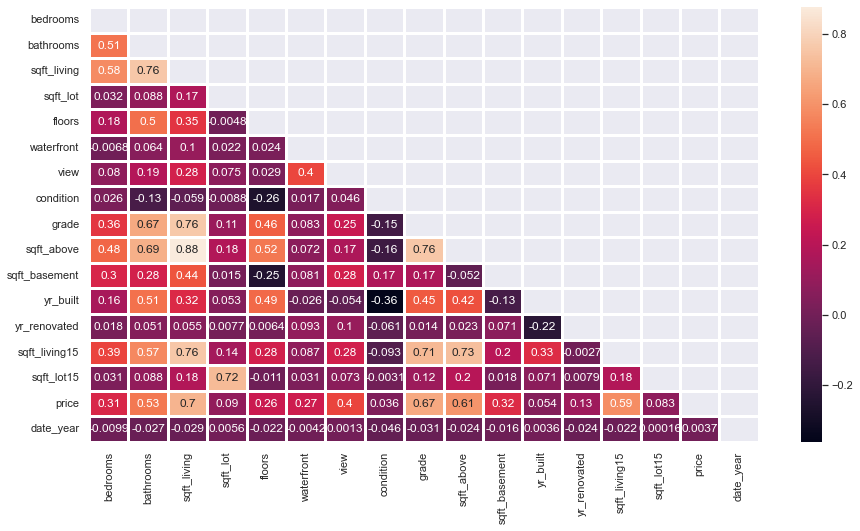

In [32]:
# the correlations matrix from numerical columns
correlations_matrix = df_num.corr()
sns.heatmap(correlations_matrix,sns.set(rc = {'figure.figsize':(15,8)}), linecolor='white', linewidths=3, mask=mask, annot=True)
plt.show()

#### column price will be our target 

In [33]:
# let's check the correlation for each numerical column with the column 'price'
for i in df_num:
    correlation_with_price = df_num[i].corr(df_num['price'])
    print(i,'has correlation with price: ', round(correlation_with_price ,2))

bedrooms has correlation with price:  0.31
bathrooms has correlation with price:  0.53
sqft_living has correlation with price:  0.7
sqft_lot has correlation with price:  0.09
floors has correlation with price:  0.26
waterfront has correlation with price:  0.27
view has correlation with price:  0.4
condition has correlation with price:  0.04
grade has correlation with price:  0.67
sqft_above has correlation with price:  0.61
sqft_basement has correlation with price:  0.32
yr_built has correlation with price:  0.05
yr_renovated has correlation with price:  0.13
sqft_living15 has correlation with price:  0.59
sqft_lot15 has correlation with price:  0.08
price has correlation with price:  1.0
date_year has correlation with price:  0.0


In [34]:
df_num.corr()['price'].sort_values(ascending=False)
# There are various strength of correlation:
# < 0.3 - very weak correlation (on table it is replaced by 0)
# > 0.3 & < 0.5 - weak correaltion
# > 0.5 & < 0.7 - moderate correlation
# > 0.7 - strong correlation
# It also works for negative coefficients.

price            1.000000
sqft_living      0.701917
grade            0.667951
sqft_above       0.605368
sqft_living15    0.585241
bathrooms        0.525906
view             0.397370
sqft_basement    0.323799
bedrooms         0.308787
waterfront       0.266398
floors           0.256804
yr_renovated     0.126424
sqft_lot         0.089876
sqft_lot15       0.082845
yr_built         0.053953
condition        0.036056
date_year        0.003727
Name: price, dtype: float64

In [35]:
# let's filter by checking the features that have correlation > 0,55 or < -0,55 with the target 'price'
correlations_matrix = df_num.corr()
df_high_correlated=correlations_matrix[(correlations_matrix['price'] > .55) | (correlations_matrix['price'] < -.55)]['price']
df_high_correlated

sqft_living      0.701917
grade            0.667951
sqft_above       0.605368
sqft_living15    0.585241
price            1.000000
Name: price, dtype: float64

In [36]:
# Let's also check the features that have low correlation with the target 'price'
correlations_matrix[(correlations_matrix['price'] < .1) | (correlations_matrix['price'] < -.1)]['price']

sqft_lot      0.089876
condition     0.036056
yr_built      0.053953
sqft_lot15    0.082845
date_year     0.003727
Name: price, dtype: float64

In [37]:
# different plots per numerical pairs
# sns.pairplot(df_num)

#### some useful scatterplots with our target column and the high correlated features

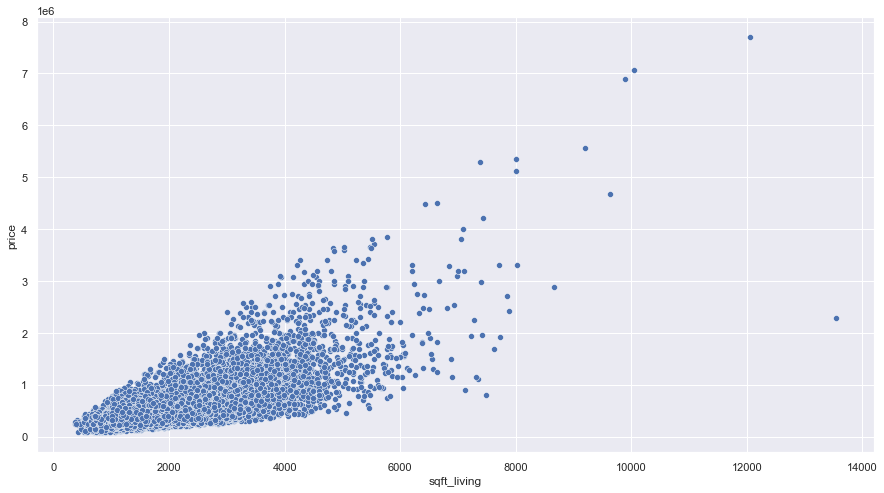

In [38]:
# scatterplot between 'price' and 'sqft_living'
sns.scatterplot(y='price',x='sqft_living',data=df)
plt.show()
# seems that it follows linear regression

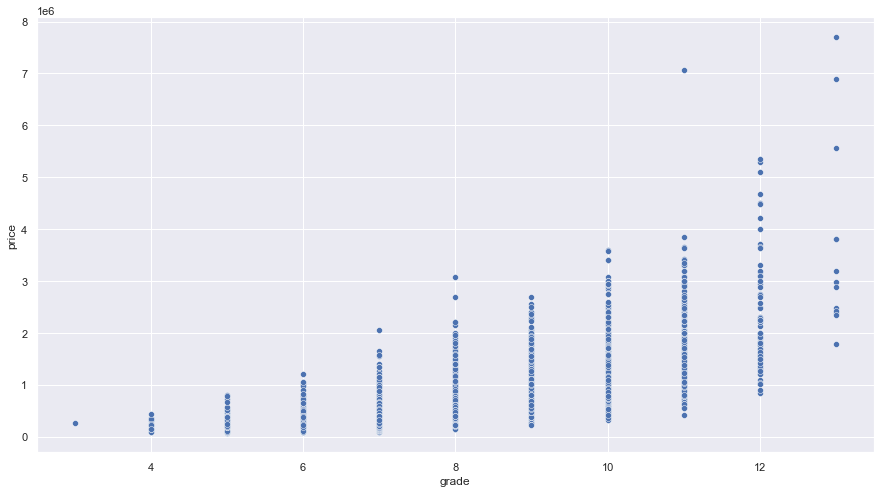

In [39]:
# scatterplot between 'price' and 'grade'
sns.scatterplot(y='price',x='grade',data=df)
plt.show()
# We can notice that the amounts are proportional amounts,
# so when the grade increases then the price increases as well and the opposite
# when the grade decreases then the price decreases as well
# close to exponential distribution or polynomial (k=3) distribution

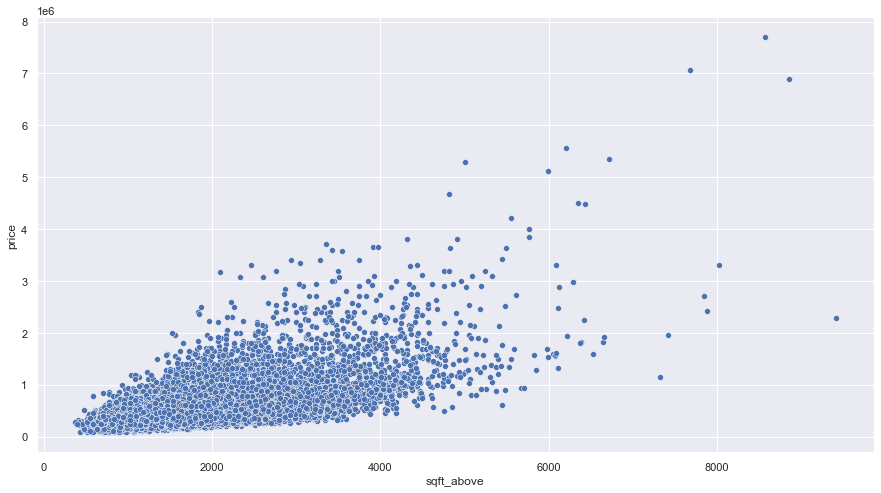

In [40]:
# scatterplot between 'price' and 'sqft_above'
sns.scatterplot(y='price',x='sqft_above',data=df)
plt.show()
# seems that it follows linear regression and the amounts are proportional amounts
# the density of the observations is in a specific area 

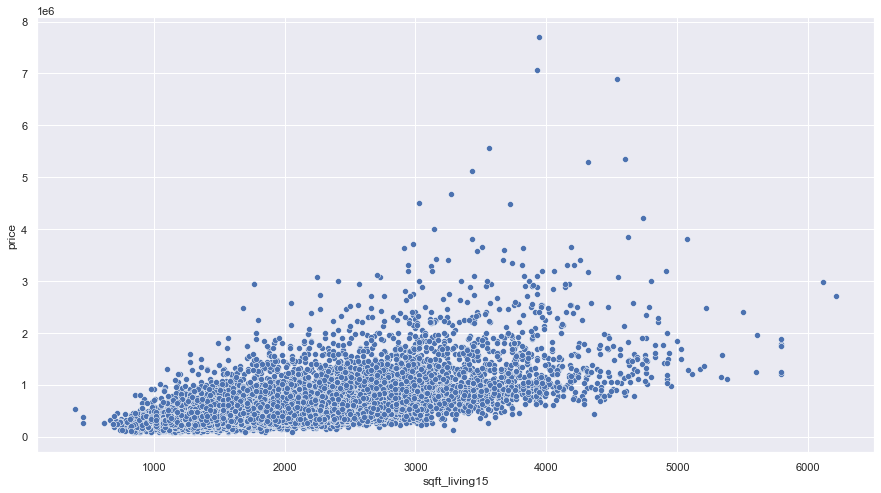

In [41]:
# scatterplot between 'price' and 'sqft_living15'
sns.scatterplot(y='price',x='sqft_living15',data=df)
plt.show()
# like sqft_living seems that it follows linear regression and the amounts are proportional amounts
# the density of the observations is in a specific area 

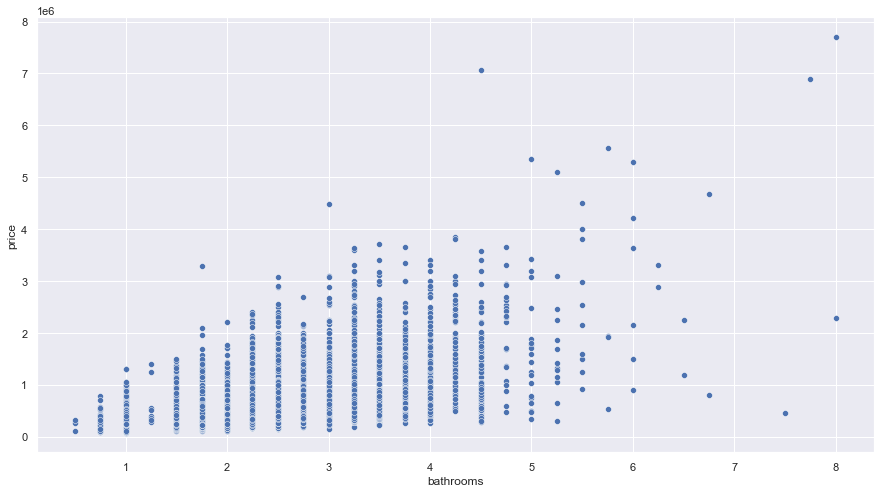

In [42]:
# scatterplot between 'price' and 'bathrooms'
sns.scatterplot(y='price',x='bathrooms',data=df)
plt.show()
# most expensive houses tend to have more bathrooms and vice versa

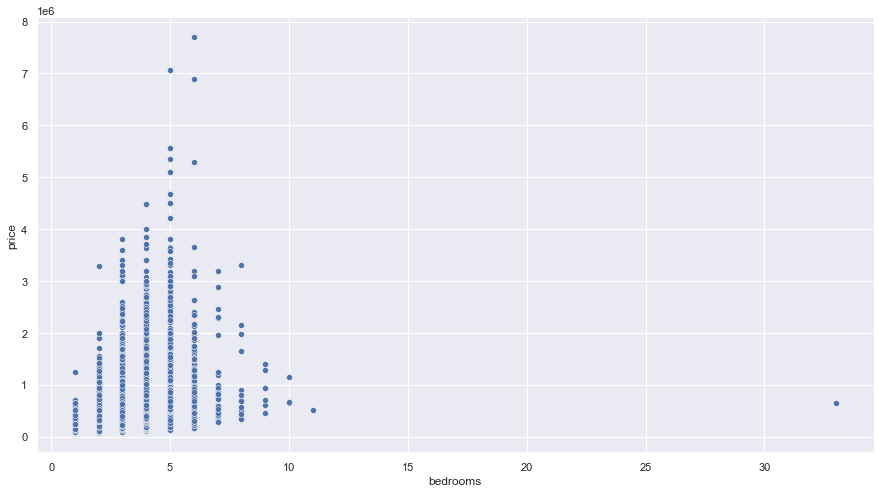

In [43]:
# scatterplot between 'price' and 'bedrooms'
sns.scatterplot(y='price',x='bedrooms',data=df)
plt.show()
# most expensive houses tend to have 3-7 bedrooms and vice versa

#### We will use three datasets and we will compare the results

#### whole data

#### Build a Model (X-y split, train-test split, etc)

In [44]:
# X-y split for the whole data
y = df['price']
X = df.drop('price', axis=1)

In [45]:
# train-test splitting
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [46]:
# from the numerical data we get the subset of the trained data
X_train_num = X_train.select_dtypes(include='number')
X_train_num

,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,sqft_living15,sqft_lot15,date_year
id,,,,,,,,,,,,,,,,,
9834201100,4,2.00,1440,4855,2.0,0,0,4,7,1440,0,1972,0,98144,1300,4080,2014
7795810110,3,1.75,1430,9857,1.0,0,2,4,7,1140,290,1980,0,98045,1310,9880,2015
1853081250,4,2.75,3120,5000,2.0,0,0,3,9,3120,0,2010,0,98074,3200,5000,2014
2558630350,4,2.50,2060,6958,1.0,0,0,3,7,1220,840,1974,0,98034,1760,7350,2015
3362401000,3,2.00,2500,4080,1.5,0,0,5,7,1680,820,1922,0,98103,1550,3060,2014
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7853230570,3,2.50,2230,5800,2.0,0,0,3,7,2230,0,2004,0,98065,2230,6088,2014
4140940150,4,2.75,2770,3852,2.0,0,0,3,8,2770,0,2014,0,98178,1810,5641,2014
8658300480,4,1.50,1530,9000,1.0,0,0,4,6,1530,0,1976,0,98014,1520,8500,2014


In [47]:
# we drop the column zipcode as we have already converted it to categorical
X_train_num = X_train_num.drop('zipcode', axis=1)
X_train_num

,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,sqft_living15,sqft_lot15,date_year
id,,,,,,,,,,,,,,,,
9834201100,4,2.00,1440,4855,2.0,0,0,4,7,1440,0,1972,0,1300,4080,2014
7795810110,3,1.75,1430,9857,1.0,0,2,4,7,1140,290,1980,0,1310,9880,2015
1853081250,4,2.75,3120,5000,2.0,0,0,3,9,3120,0,2010,0,3200,5000,2014
2558630350,4,2.50,2060,6958,1.0,0,0,3,7,1220,840,1974,0,1760,7350,2015
3362401000,3,2.00,2500,4080,1.5,0,0,5,7,1680,820,1922,0,1550,3060,2014
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7853230570,3,2.50,2230,5800,2.0,0,0,3,7,2230,0,2004,0,2230,6088,2014
4140940150,4,2.75,2770,3852,2.0,0,0,3,8,2770,0,2014,0,1810,5641,2014
8658300480,4,1.50,1530,9000,1.0,0,0,4,6,1530,0,1976,0,1520,8500,2014


In [48]:
# from the categorical data we get the subset of the trained data
X_train_cat = X_train[['zipcode']]
X_train_cat

,zipcode
id,
9834201100,98144
7795810110,98045
1853081250,98074
2558630350,98034
3362401000,98103
...,...
7853230570,98065
4140940150,98178
8658300480,98014


In [49]:
# Let's use One Hot/Label Encoding for the categorical feature-zipcode
encoder_train = OneHotEncoder(drop='first').fit(X_train_cat)
encoded_train = encoder_train.transform(X_train_cat).toarray()
cols = encoder_train.get_feature_names(input_features=X_train_cat.columns)
onehot_encoded_train = pd.DataFrame(encoded_train, columns=cols)
onehot_encoded_train#.head()

,zipcode_98002,zipcode_98003,zipcode_98004,zipcode_98005,zipcode_98006,zipcode_98007,zipcode_98008,zipcode_98010,zipcode_98011,zipcode_98014,...,zipcode_98146,zipcode_98148,zipcode_98155,zipcode_98166,zipcode_98168,zipcode_98177,zipcode_98178,zipcode_98188,zipcode_98198,zipcode_98199
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17272,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
17273,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
17274,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
17275,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0


In [50]:
# Using Min-max scaler for the X trained numerical data
# For each column, each value in the column is subtracted by the max of the column 
# and then divided by the difference of max and min of the column. Data range from 0 - 1, instead of min to max
# It is very sensitive to the presence of outliers.

MinMaxtransformer = MinMaxScaler().fit(X_train_num)
x_train_norm = MinMaxtransformer.transform(X_train_num)
print(x_train_norm.shape)
x_train_norm = pd.DataFrame(x_train_norm,columns=X_train_num.columns)
x_train_norm.head()

(17277, 16)


,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,sqft_living15,sqft_lot15,date_year
0,0.3,0.200000,0.081245,0.002626,0.4,0.0,0.0,0.75,0.4,0.118363,0.000000,0.626087,0.0,0.155051,0.003939,0.0
1,0.2,0.166667,0.080486,0.005656,0.0,0.0,0.5,0.75,0.4,0.085177,0.060166,0.695652,0.0,0.156772,0.010601,1.0
2,0.3,0.300000,0.208808,0.002714,0.4,0.0,0.0,0.50,0.6,0.304204,0.000000,0.956522,0.0,0.482017,0.004996,0.0
3,0.3,0.266667,0.128322,0.003900,0.0,0.0,0.0,0.50,0.4,0.094027,0.174274,0.643478,0.0,0.234211,0.007695,1.0
4,0.2,0.200000,0.161731,0.002156,0.2,0.0,0.0,1.00,0.4,0.144912,0.170124,0.191304,0.0,0.198073,0.002767,0.0


In [51]:
# def suma(num1, num2):
#     total = num1 + num2
#     return total

# # arg(input) -> X -> result(output)

# lets_store = suma(5, 3)
# print(lets_store)

# # input: X_cat, encoder
# # process: initalizing encoder, fit, transform
# # output: X_cat_encoded, encoder

In [52]:
# concatenating DataFrames of the normalized trained numerical and encoded (trained) categorical-zipcode  
X_train_concat = pd.concat([x_train_norm, onehot_encoded_train], axis=1)
X_train_concat

,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,...,zipcode_98146,zipcode_98148,zipcode_98155,zipcode_98166,zipcode_98168,zipcode_98177,zipcode_98178,zipcode_98188,zipcode_98198,zipcode_98199
0,0.3,0.200000,0.081245,0.002626,0.4,0.0,0.0,0.75,0.4,0.118363,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.2,0.166667,0.080486,0.005656,0.0,0.0,0.5,0.75,0.4,0.085177,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.3,0.300000,0.208808,0.002714,0.4,0.0,0.0,0.50,0.6,0.304204,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.3,0.266667,0.128322,0.003900,0.0,0.0,0.0,0.50,0.4,0.094027,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.2,0.200000,0.161731,0.002156,0.2,0.0,0.0,1.00,0.4,0.144912,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17272,0.2,0.266667,0.141230,0.003198,0.4,0.0,0.0,0.50,0.4,0.205752,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
17273,0.3,0.300000,0.182232,0.002018,0.4,0.0,0.0,0.50,0.5,0.265487,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
17274,0.3,0.133333,0.088079,0.005137,0.0,0.0,0.0,0.75,0.3,0.128319,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
17275,0.0,0.033333,0.000759,0.008771,0.0,0.0,0.0,0.50,0.2,0.001106,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0


In [53]:
# Apply linear regression to the trained data. Fit the model in Supervised learning. 
# Assume a linear relationship between 𝑦 and 𝐱: 𝑦 = 𝛽₀ + 𝛽₁𝑥₁ + ⋯ + 𝛽ᵣ𝑥ᵣ + 𝜀
model_train = LinearRegression()
model_train.fit(X_train_concat, y_train)

LinearRegression()

In [54]:
# shapes of the datasets
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(17277, 17)
(4320, 17)
(17277,)
(4320,)


In [55]:
# from the numerical data we get the subset of the test data
X_test_num = X_test.select_dtypes(include='number')
X_test_num

,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,sqft_living15,sqft_lot15,date_year
id,,,,,,,,,,,,,,,,,
6303401050,3,0.75,850,8573,1.0,0,0,3,6,600,250,1945,0,98146,850,8382,2015
1995200200,3,1.00,1510,6083,1.0,0,0,4,6,860,650,1940,0,98115,1510,5712,2014
1423089118,4,2.25,1790,42000,1.0,0,0,3,7,1170,620,1983,0,98045,2060,50094,2015
9349900110,2,1.50,1140,2500,1.0,0,1,3,7,630,510,1988,0,98106,1500,5000,2015
455000395,3,1.00,1500,3920,1.0,0,0,3,7,1000,500,1947,0,98107,1640,4017,2014
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
835000055,2,1.00,1020,5130,1.0,0,0,4,6,1020,0,1948,0,98002,1200,6497,2014
2612000200,3,2.50,2050,8172,2.0,0,0,3,8,2050,0,2002,0,98168,2140,5664,2015
2623029078,5,2.00,2120,137565,1.5,0,0,3,7,2120,0,1913,0,98070,2120,157123,2014


In [56]:
# from the numerical data we get the subset of the test data and drop the column zipcode which we have already converted to categorical
X_test_num = X_test_num.drop('zipcode', axis=1)
X_test_num

,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,sqft_living15,sqft_lot15,date_year
id,,,,,,,,,,,,,,,,
6303401050,3,0.75,850,8573,1.0,0,0,3,6,600,250,1945,0,850,8382,2015
1995200200,3,1.00,1510,6083,1.0,0,0,4,6,860,650,1940,0,1510,5712,2014
1423089118,4,2.25,1790,42000,1.0,0,0,3,7,1170,620,1983,0,2060,50094,2015
9349900110,2,1.50,1140,2500,1.0,0,1,3,7,630,510,1988,0,1500,5000,2015
455000395,3,1.00,1500,3920,1.0,0,0,3,7,1000,500,1947,0,1640,4017,2014
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
835000055,2,1.00,1020,5130,1.0,0,0,4,6,1020,0,1948,0,1200,6497,2014
2612000200,3,2.50,2050,8172,2.0,0,0,3,8,2050,0,2002,0,2140,5664,2015
2623029078,5,2.00,2120,137565,1.5,0,0,3,7,2120,0,1913,0,2120,157123,2014


In [57]:
# from the categorical data we get the subset of the test data
X_test_cat = X_test[['zipcode']]
X_test_cat

,zipcode
id,
6303401050,98146
1995200200,98115
1423089118,98045
9349900110,98106
455000395,98107
...,...
835000055,98002
2612000200,98168
2623029078,98070


In [58]:
# Let's use One Hot/Label Encoding for the categorical feature
# encoder_train = OneHotEncoder(drop='first').fit(X_train_cat)
# we use for the encoder_test the same dataset X_train_cat
encoder_test = OneHotEncoder(drop='first').fit(X_train_cat)
encoded_test = encoder_test.transform(X_test_cat).toarray()
cols = encoder_test.get_feature_names(input_features=X_test_cat.columns)
onehot_encoded_test = pd.DataFrame(encoded_test, columns=cols)
onehot_encoded_test#.head()

,zipcode_98002,zipcode_98003,zipcode_98004,zipcode_98005,zipcode_98006,zipcode_98007,zipcode_98008,zipcode_98010,zipcode_98011,zipcode_98014,...,zipcode_98146,zipcode_98148,zipcode_98155,zipcode_98166,zipcode_98168,zipcode_98177,zipcode_98178,zipcode_98188,zipcode_98198,zipcode_98199
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4315,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4316,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
4317,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4318,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


#### using Min-max scaler for numerical features

In [59]:
# Using Min-max scaler for X test data
# For each column, each value in the column is subtracted by the max of the column 
# and then divided by the difference of max and min of the column. Data range from 0 - 1, instead of min to max
# It is very sensitive to the presence of outliers.
# without fit for test
x_test_norm = MinMaxtransformer.transform(X_test_num)
print(x_test_norm.shape)
x_test_norm = pd.DataFrame(x_test_norm,columns=X_test_num.columns)
x_test_norm.head()

(4320, 16)


,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,sqft_living15,sqft_lot15,date_year
0,0.2,0.033333,0.036446,0.004878,0.0,0.0,0.00,0.50,0.3,0.025442,0.051867,0.391304,0.0,0.077611,0.008881,1.0
1,0.2,0.066667,0.086560,0.003370,0.0,0.0,0.00,0.75,0.3,0.054204,0.134855,0.347826,0.0,0.191189,0.005814,0.0
2,0.3,0.233333,0.107821,0.025127,0.0,0.0,0.00,0.50,0.4,0.088496,0.128631,0.721739,0.0,0.285837,0.056795,1.0
3,0.1,0.133333,0.058466,0.001199,0.0,0.0,0.25,0.50,0.4,0.028761,0.105809,0.765217,0.0,0.189468,0.004996,1.0
4,0.2,0.066667,0.085801,0.002060,0.0,0.0,0.00,0.50,0.4,0.069690,0.103734,0.408696,0.0,0.213560,0.003867,0.0


In [60]:
# concatenating DataFrames x test normalised and encoded test data
X_test_concat = pd.concat([x_test_norm, onehot_encoded_test], axis=1)
X_test_concat

,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,...,zipcode_98146,zipcode_98148,zipcode_98155,zipcode_98166,zipcode_98168,zipcode_98177,zipcode_98178,zipcode_98188,zipcode_98198,zipcode_98199
0,0.2,0.033333,0.036446,0.004878,0.0,0.0,0.00,0.50,0.3,0.025442,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.2,0.066667,0.086560,0.003370,0.0,0.0,0.00,0.75,0.3,0.054204,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.3,0.233333,0.107821,0.025127,0.0,0.0,0.00,0.50,0.4,0.088496,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.1,0.133333,0.058466,0.001199,0.0,0.0,0.25,0.50,0.4,0.028761,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.2,0.066667,0.085801,0.002060,0.0,0.0,0.00,0.50,0.4,0.069690,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4315,0.1,0.066667,0.049355,0.002793,0.0,0.0,0.00,0.75,0.3,0.071903,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4316,0.2,0.266667,0.127563,0.004635,0.4,0.0,0.00,0.50,0.5,0.185841,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
4317,0.4,0.200000,0.132878,0.083015,0.2,0.0,0.00,0.50,0.4,0.193584,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4318,0.2,0.266667,0.123007,0.004275,0.4,0.0,0.00,0.50,0.4,0.179204,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [61]:
# Let's find the R2 score (Coefficient of determination) 
# The coefficient of determination, denoted as 𝑅², tells you which amount of variation in 𝑦 can be explained
# by the dependence on 𝐱 using the particular regression model. 
# Larger 𝑅² indicates a better fit and means that the model can better explain the variation of the output with different inputs.
from sklearn.metrics import r2_score
predictions = model_train.predict(X_test_concat)
r2_score(y_test, predictions) # or model.score(X1_test, y_test) An unbiased estimation of the predictive performance of your model is based on test data

0.7957298279868469

In [62]:
# MSE (Mean Squared Error) represents the difference between the original and predicted values extracted
# by squared the average difference over the data set.
mean_squared_error(y_test, predictions, squared=False)

163092.92424160498

In [63]:
# RMSE (Root Mean Squared Error) is the error rate by the square root of MSE.
import math
math.sqrt(mean_squared_error(y_test, predictions, squared=False))

403.8476497908648

In [64]:
# MAE (Mean absolute error) represents the difference between the original and predicted values extracted 
#by averaged the absolute difference over the data set.
mean_absolute_error(y_test, predictions)

96420.5139657669

In [65]:
# all of them
print('r2 score is: ', r2_score(y_test, predictions),', RMSE is: ', math.sqrt(mean_squared_error(y_test, predictions, squared=False)), ', MAE is: ', mean_absolute_error(y_test, predictions),'and MSE is: ', mean_squared_error(y_test, predictions, squared=False))

r2 score is:  0.7957298279868469 , RMSE is:  403.8476497908648 , MAE is:  96420.5139657669 and MSE is:  163092.92424160498


In [66]:
# bias 𝑏₀
print('intercept:', model_train.intercept_)

intercept: -271836.9905654917


In [67]:
# array containing 𝑏₁, 𝑏₂, ... respectively
print('slope:', model_train.coef_)

slope: [-2.84313820e+05  1.74650107e+05  3.11802384e+17  3.46602692e+05
 -1.13590799e+05  6.50918456e+05  2.23003979e+05  1.11636131e+05
  5.83190591e+05 -2.14023808e+17 -1.14114464e+17 -7.73760000e+04
  3.81600000e+04  7.46800000e+04 -1.51900000e+05  3.09120000e+04
  2.99715000e+04 -7.00200000e+03  7.49986000e+05  3.06844000e+05
  2.63000000e+05  2.47916000e+05  2.51560000e+05  6.85570000e+04
  1.23879000e+05  1.07692000e+05  9.24530000e+04 -4.98400000e+03
 -2.79080000e+04  1.63282000e+05  1.69764000e+05  1.20095000e+05
  2.16688000e+05  5.93600000e+03  1.78740000e+04  8.22000000e+03
  3.62282000e+05  2.06288000e+05  3.21780000e+04  1.36371200e+06
  5.18922000e+05  8.22700000e+03  9.67920000e+04  2.30668000e+05
  1.96016000e+05  4.73440000e+04  9.93740000e+04  3.06000000e+04
  8.27820000e+04  8.14880000e+04 -6.51000000e+03  1.48149000e+05
  1.79124000e+05  1.65432000e+05  1.18398000e+05 -2.97995000e+04
  5.19525000e+05  3.46324000e+05  4.81750000e+05  1.56040000e+05
  3.49578000e+05  

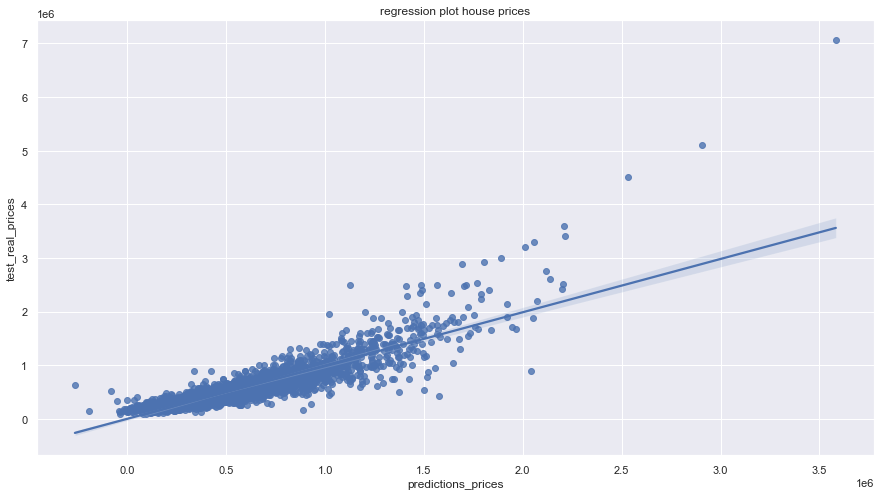

In [68]:
# regression plot between predictions_prices and test_real_prices
sns.regplot(x=predictions, y=y_test)
plt.xlabel('predictions_prices')
plt.ylabel('test_real_prices')
plt.title('regression plot house prices');
# seems that it follows linear regression

#### using the StandardScaler

In [69]:
# using the StandardScaler
# For each column, each value in the column is subtracted by the mean of the column and then divided by the standard deviation.
# Works row wise, so it takes information from the whole column. It is wise to do the train/test split beforehand.
Standard_scaler = StandardScaler().fit(X_train_num) 
x_train_num_st = Standard_scaler.transform(X_train_num)
x_train_num_st = pd.DataFrame(x_train_num_st,columns=X_train_num.columns)
x_train_num_st.head(3)

,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,sqft_living15,sqft_lot15,date_year
0,0.691203,-0.149233,-0.701342,-0.252125,0.933592,-0.087744,-0.303509,0.905470,-0.562768,-0.424152,-0.660789,0.035248,-0.209281,-1.005735,-0.322386,-0.689223
1,-0.414530,-0.474899,-0.712241,-0.127687,-0.915081,-0.087744,2.304657,0.905470,-0.562768,-0.787361,-0.007125,0.307771,-0.209281,-0.991102,-0.107778,1.450910
2,0.691203,0.827764,1.129672,-0.248518,0.933592,-0.087744,-0.303509,-0.631098,1.148415,1.609819,-0.660789,1.329731,-0.209281,1.774496,-0.288344,-0.689223


In [70]:
# no fitting for the test set
x_test_num_st = Standard_scaler.transform(X_test_num)
x_test_num_st = pd.DataFrame(x_test_num_st,columns=X_test_num.columns) 
x_test_num_st.head(3)

,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,sqft_living15,sqft_lot15,date_year
0,-0.414530,-1.777562,-1.344376,-0.159630,-0.915081,-0.087744,-0.303509,-0.631098,-1.418359,-1.441138,-0.097286,-0.884516,-0.209281,-1.664211,-0.163206,1.450910
1,-0.414530,-1.451896,-0.625050,-0.221575,-0.915081,-0.087744,-0.303509,0.905470,-1.418359,-1.126357,0.804320,-1.054842,-0.209281,-0.698446,-0.261999,-0.689223
2,0.691203,0.176433,-0.319881,0.671952,-0.915081,-0.087744,-0.303509,-0.631098,-0.562768,-0.751041,0.736700,0.409967,-0.209281,0.106357,1.380191,1.450910


In [71]:
# encoding
encoder_train_st = OneHotEncoder(handle_unknown='error', drop='first')
encoder_train_st.fit(X_train_cat)

encoder_test_st = OneHotEncoder(handle_unknown='error', drop='first')
encoder_test_st.fit(X_test_cat)

OneHotEncoder(drop='first')

In [72]:
encoded_train_st = encoder_train_st.transform(X_train_cat).toarray()
encoded_test_st = encoder_test_st.transform(X_test_cat).toarray()

In [73]:
# concatenating train sets
X_concat_train_st = np.concatenate([x_train_num_st, encoded_train_st], axis=1) # it is an array
X_concat_train_st

array([[ 0.69120327, -0.14923285, -0.70134184, ...,  0.        ,
         0.        ,  0.        ],
       [-0.41452996, -0.47489864, -0.71224073, ...,  0.        ,
         0.        ,  0.        ],
       [ 0.69120327,  0.8277645 ,  1.12967201, ...,  0.        ,
         0.        ,  0.        ],
       ...,
       [ 0.69120327, -0.80056442, -0.60325181, ...,  0.        ,
         0.        ,  0.        ],
       [-2.62599643, -1.77756177, -1.85662439, ...,  0.        ,
         0.        ,  0.        ],
       [ 0.69120327,  0.50209871,  0.73186246, ...,  0.        ,
         0.        ,  0.        ]])

In [74]:
# concatenating test sets
X_concat_test_st = np.concatenate([x_test_num_st, encoded_test_st], axis=1)
X_concat_test_st

array([[-0.41452996, -1.77756177, -1.34437646, ...,  0.        ,
         0.        ,  0.        ],
       [-0.41452996, -1.45189599, -0.62504959, ...,  0.        ,
         0.        ,  0.        ],
       [ 0.69120327,  0.17643293, -0.31988062, ...,  0.        ,
         0.        ,  0.        ],
       ...,
       [ 1.7969365 , -0.14923285,  0.03978282, ...,  0.        ,
         0.        ,  0.        ],
       [-0.41452996,  0.50209871, -0.10190278, ...,  0.        ,
         0.        ,  0.        ],
       [ 0.69120327, -0.14923285, -0.53785846, ...,  0.        ,
         0.        ,  0.        ]])

In [75]:
# using linear regression 
model1 = LinearRegression() 
model1.fit(X_concat_train_st,y_train) 

LinearRegression()

In [76]:
predictions1  = model1.predict(X_concat_test_st)
predictions1

array([110142.98498499, 451214.98498499, 313746.98498499, ...,
       286060.98498499, 259058.98498499, 269082.98498499])

In [77]:
r2=r2_score(y_test, predictions1)
rmse=mean_squared_error(y_test, predictions1, squared=False)
mse=mean_squared_error(y_test, predictions1)
mae=mean_absolute_error(y_test, predictions1)

In [78]:
# getting the metrics
r2, rmse, mse, mae

(0.7957164235084939, 163098.27534031708, 26601047418.98588, 96441.63921949963)

In [79]:
# we have similar results for the R2 score, in Min-max scaler is a little bit better 0.7943907188262112

#### using KNN-K Nearest Neighbors

In [80]:
# checking which k is the best
r2_val=[]
rmse_val = [] 
mse_val = []
mae_val = []

for K in range(20):
    K = K+1
    model = neighbors.KNeighborsRegressor(n_neighbors = K)

    model.fit(X_concat_train_st, y_train)  #fit the model
    pred=model.predict(X_concat_test_st) #make prediction on test set
   # error = math.sqrt(mean_squared_error(y_test,pred)) #calculate rmse
     #store rmse values
    
    r2_k=r2_score(y_test, pred)
    rmse_k=mean_squared_error(y_test, pred, squared=False)
    mse_k=mean_squared_error(y_test, pred)
    mae_k=mean_absolute_error(y_test, pred)
    
    r2_val.append(r2_k)
    rmse_val.append(rmse_k)
    mse_val.append(mse_k)
    mae_val.append(mae_k)
    print('r2 value for  k = ' , K , 'is:', r2_k)
    print('RMSE value for k = ' , K , 'is:', rmse_k)
    print('MSE value for k = ' , K , 'is:', mse_k)
    print('MAE value for k = ' , K , 'is:', mae_k)
    print('\n')

r2 value for  k =  1 is: 0.6060974009688429
RMSE value for k =  1 is: 226478.5446192175
MSE value for k =  1 is: 51292531172.83889
MAE value for k =  1 is: 116612.90092592593


r2 value for  k =  2 is: 0.709442567756196
RMSE value for k =  2 is: 194513.00210034935
MSE value for k =  2 is: 37835307986.09051
MAE value for k =  2 is: 105125.81574074074


r2 value for  k =  3 is: 0.7302192134736926
RMSE value for k =  3 is: 187429.58802580775
MSE value for k =  3 is: 35129850467.52402
MAE value for k =  3 is: 102224.66944444444


r2 value for  k =  4 is: 0.7320270805493858
RMSE value for k =  4 is: 186800.52661057396
MSE value for k =  4 is: 34894436741.98775
MAE value for k =  4 is: 101633.27540509259


r2 value for  k =  5 is: 0.7397256613798631
RMSE value for k =  5 is: 184097.6810937352
MSE value for k =  5 is: 33891956184.090633
MAE value for k =  5 is: 101094.44416666665


r2 value for  k =  6 is: 0.7336020062597444
RMSE value for k =  6 is: 186250.78731251016
MSE value for k =  6 is

In [81]:
# for k=3 the r2 value is bigger than the rest of ks', however the r2 score for k=3 is 0.7567616708475113,
# less than the r2 score with scaling in linear regression

In [82]:
# KNN regressor will take the distances from the k=3 nearest neightbors and "average" them for the prediction.
model_k3 = neighbors.KNeighborsRegressor(n_neighbors = 3)
model_k3.fit(X_concat_train_st, y_train)  
pred_k3=model_k3.predict(X_concat_test_st)

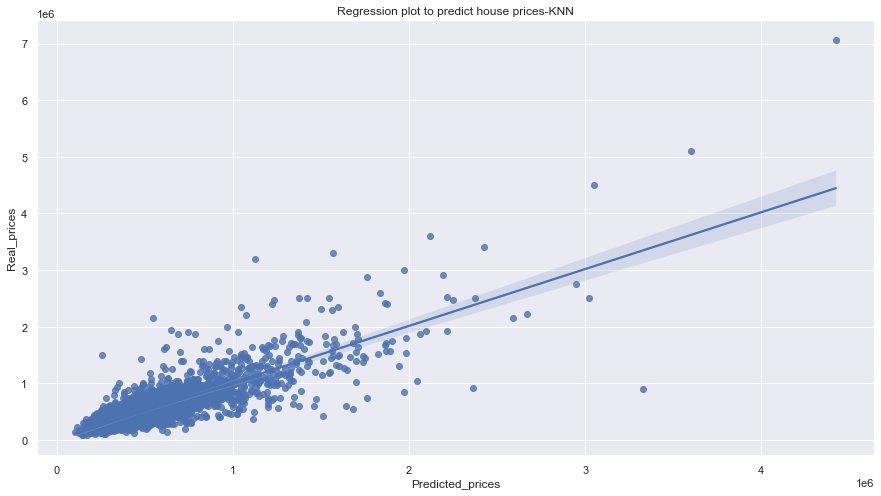

In [83]:
# regression plot between Predicted_prices-Real_prices using KNN-K Nearest Neighbors
sns.regplot(x=pred_k3, y=y_test)
plt.xlabel('Predicted_prices')
plt.ylabel('Real_prices')
plt.title('Regression plot to predict house prices-KNN');

#### checking outliers

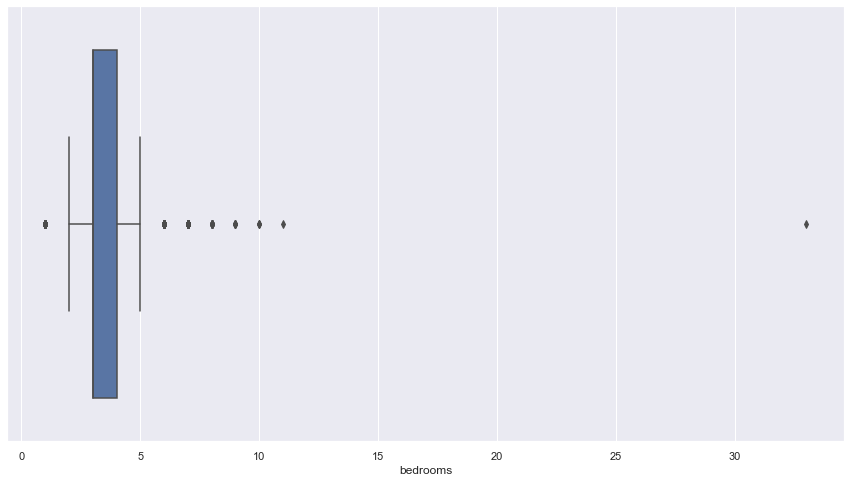

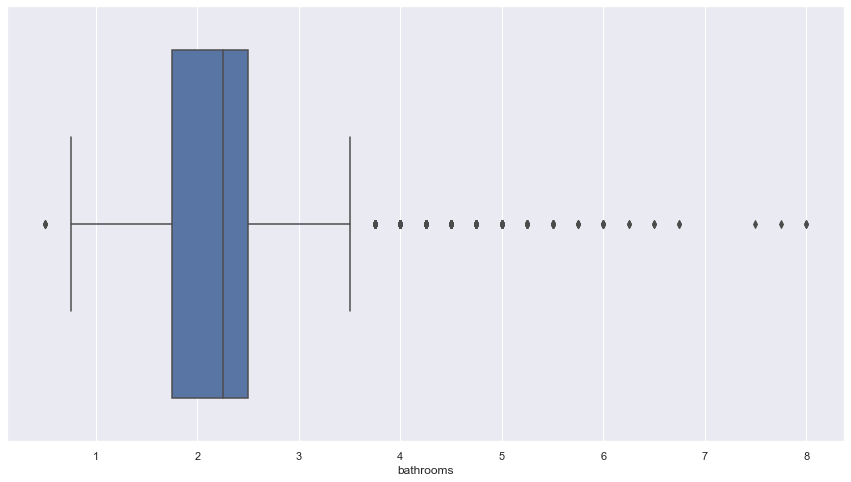

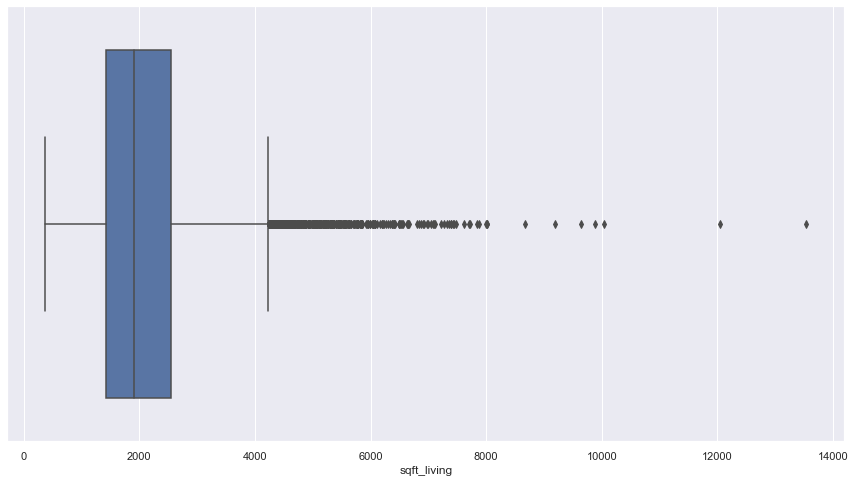

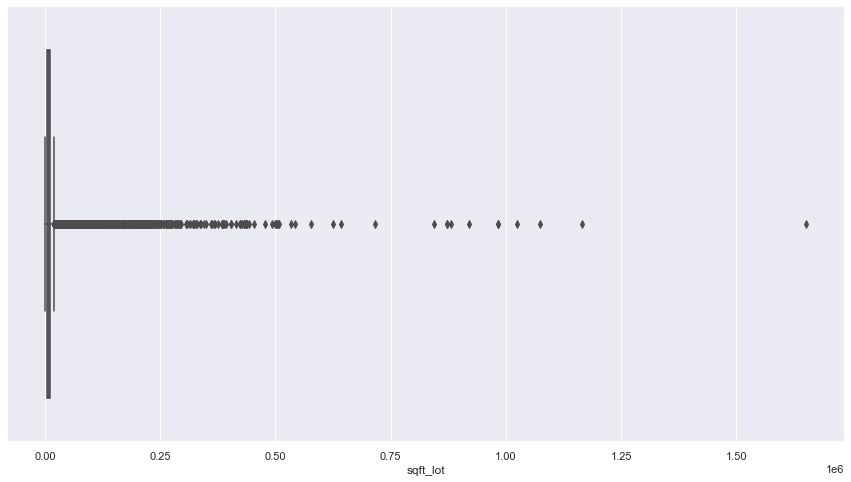

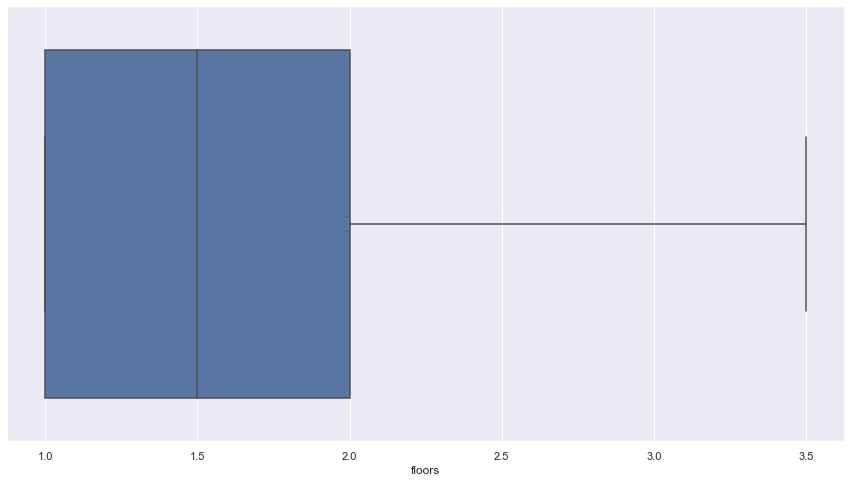

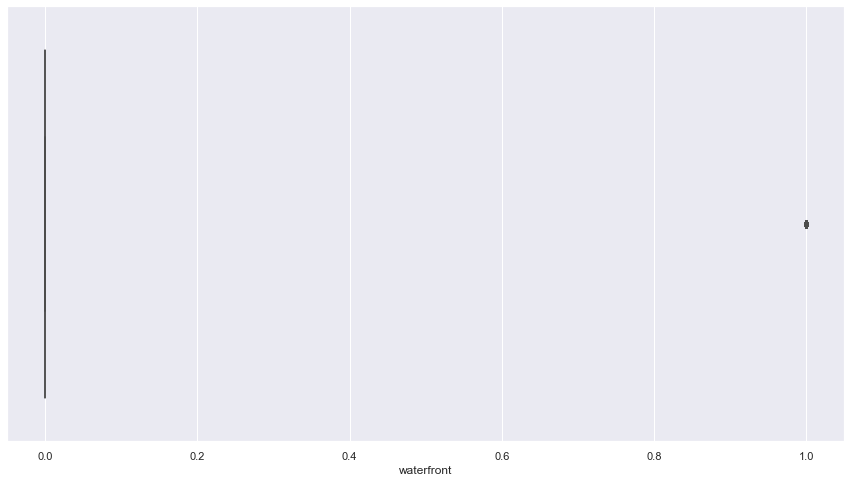

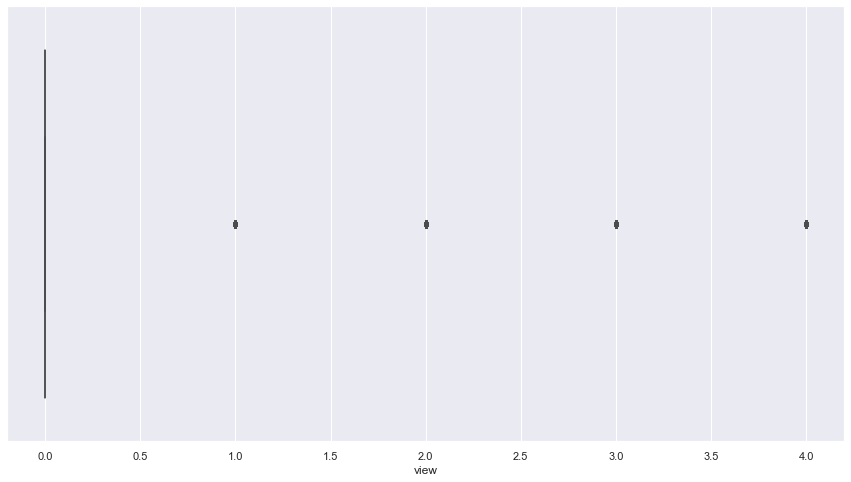

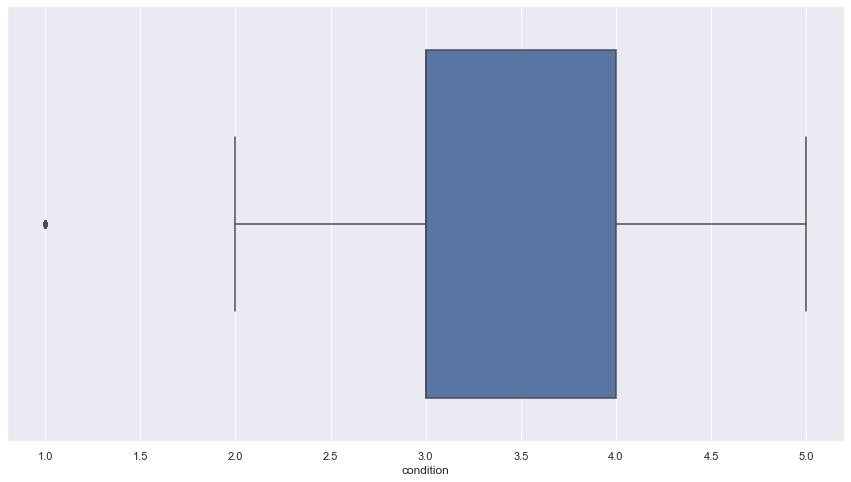

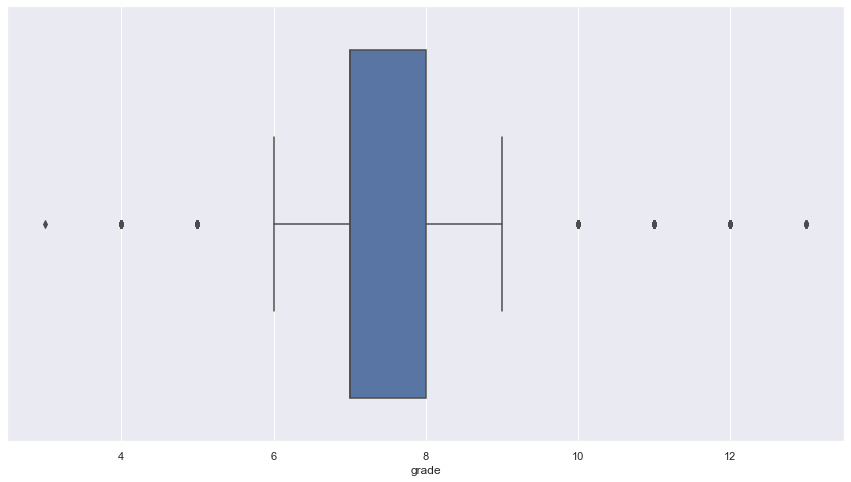

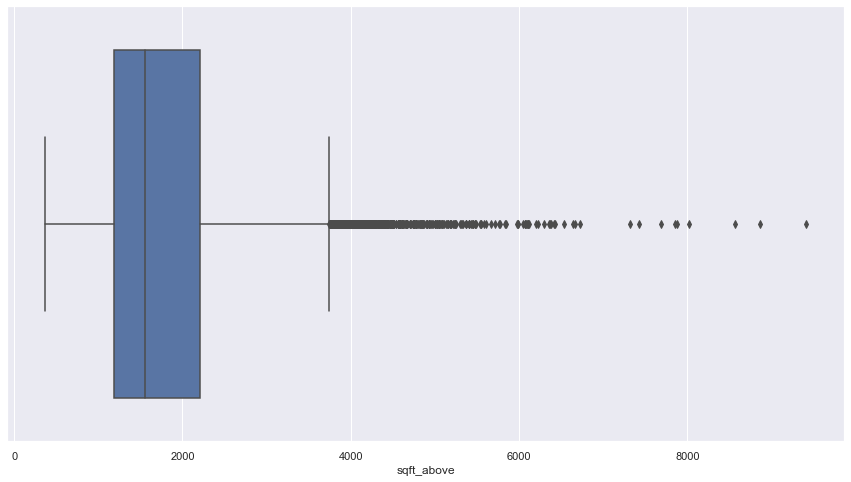

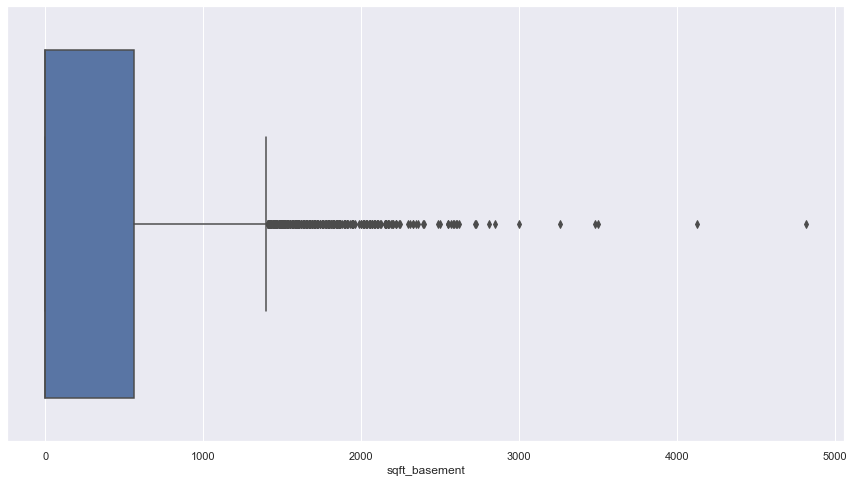

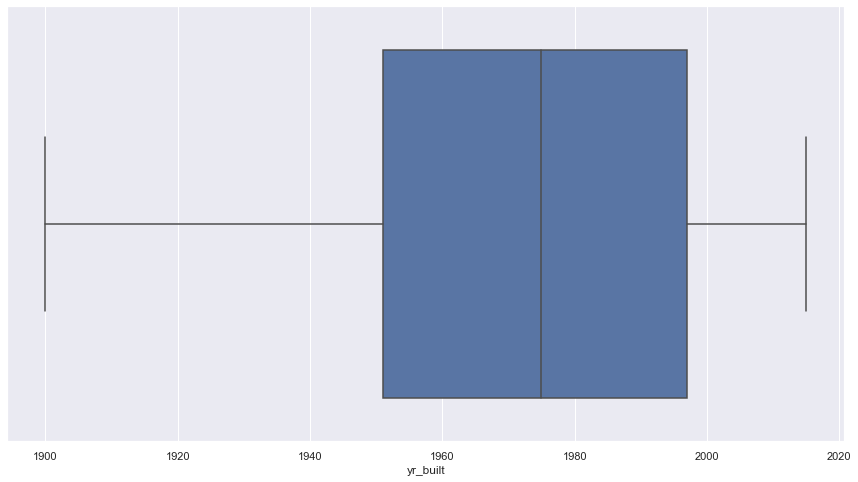

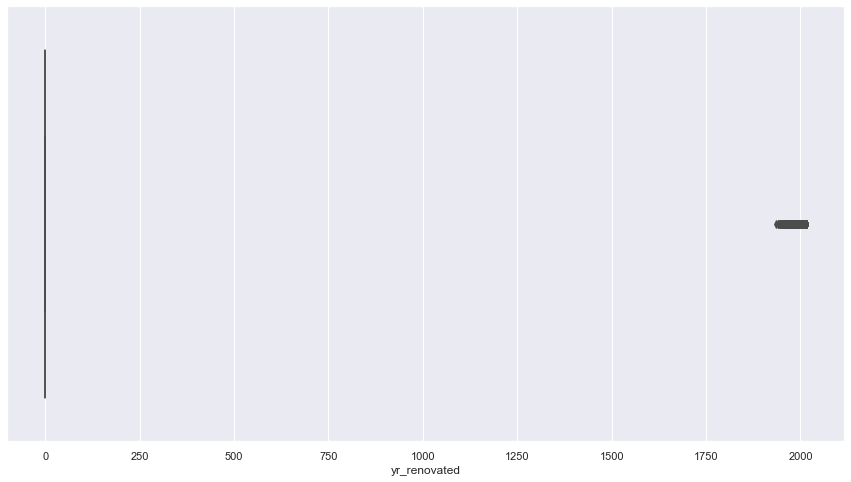

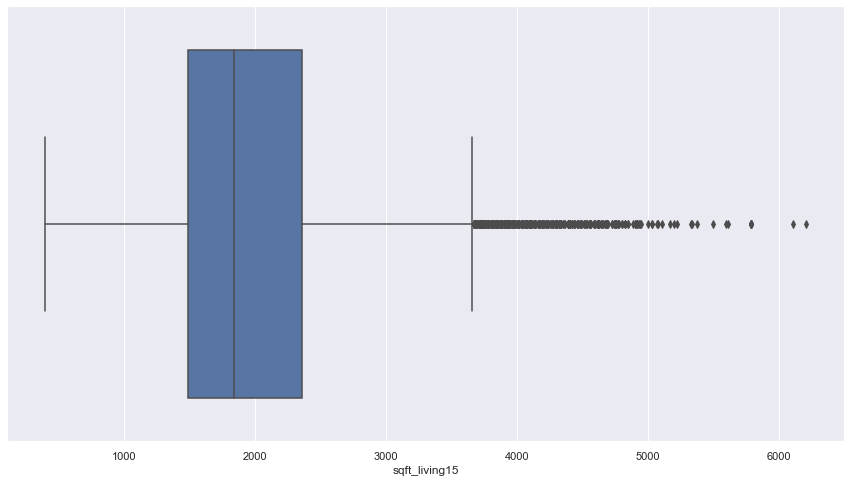

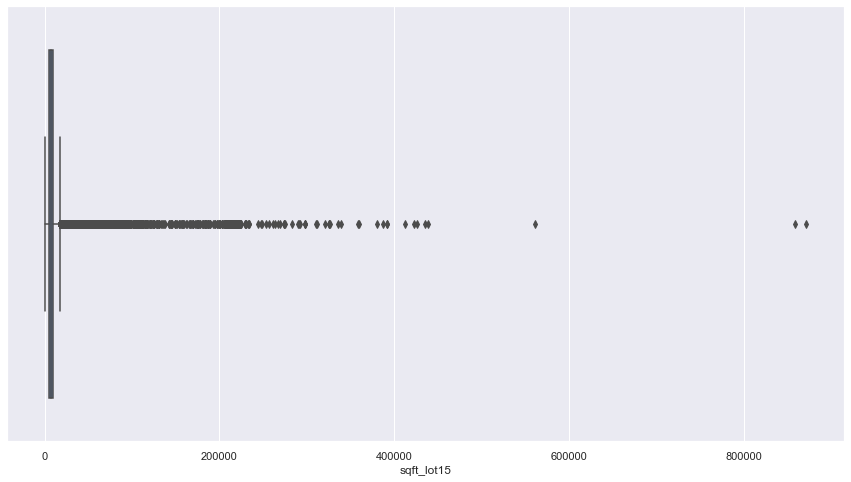

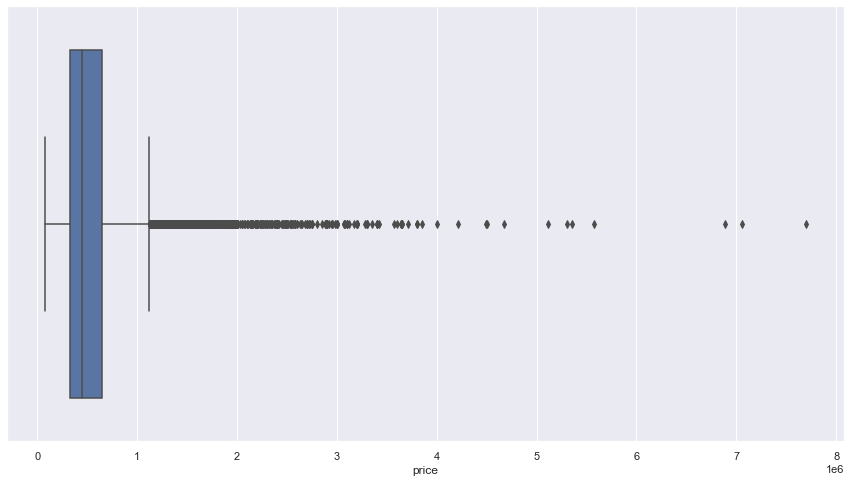

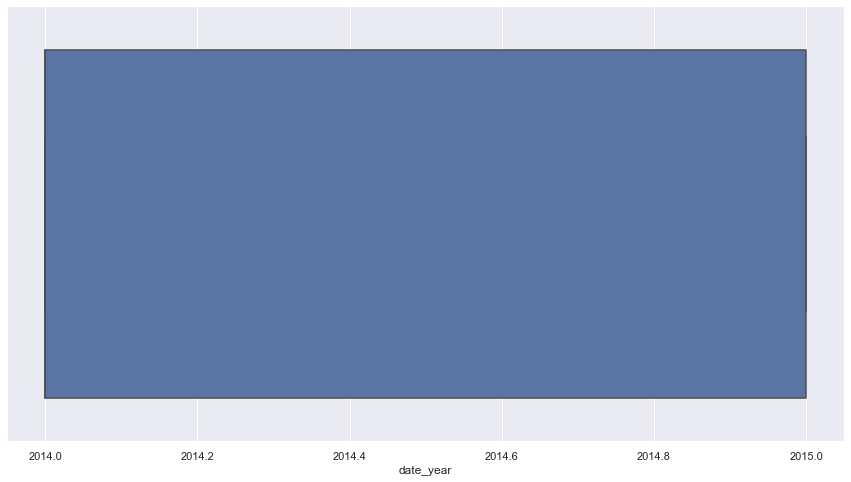

In [84]:
# Let's check in detail the outliers in the numerical variables with boxplots, so
for col in df_num:
    sns.boxplot(df_num[col])
    plt.show()

In [85]:
# We can notice a lot of outliers, especially in some columns like bathrooms, sqft_living, sqft_lot, sqft_above, sqft_basement  
# sqft_living15, sqft_lot15 and price. One solution is scaling, later we will try different ways of scaling  

#### outliers on the target variable:

<AxesSubplot:xlabel='price', ylabel='Density'>

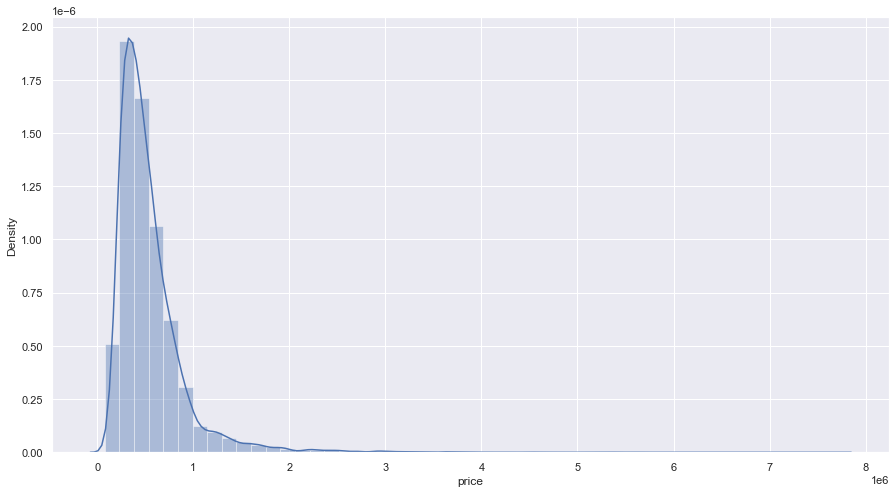

In [86]:
# distribution plot of the target variable
sns.distplot(df['price'])
# it is skewed

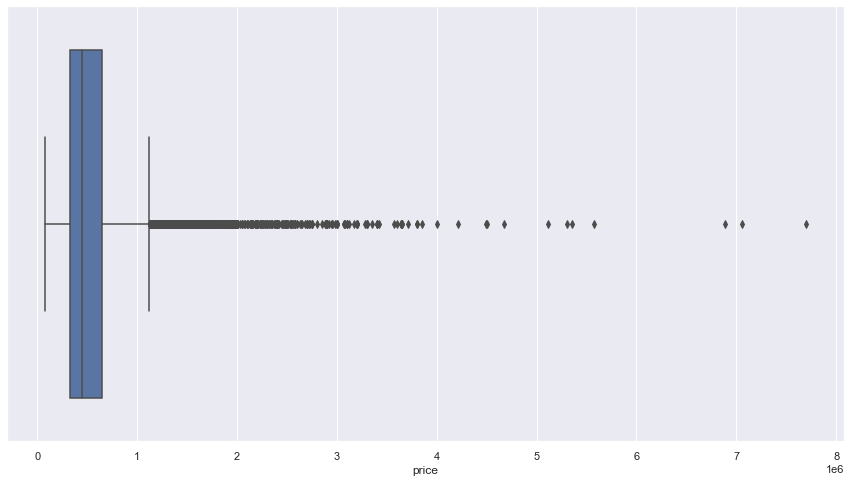

In [87]:
# boxplot of the target variable
sns.boxplot(df['price'])
plt.show()
# we have a lot of outliers at high prices, especially between 75 percentile and the maximum price

In [88]:
# let's filter the outliers by price
df[df['price'] < 650000]

,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,sqft_living15,sqft_lot15,price,date_year
id,,,,,,,,,,,,,,,,,,
7129300520,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,1340,5650,221900,2014
6414100192,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,1690,7639,538000,2014
5631500400,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,2720,8062,180000,2015
2487200875,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,1360,5000,604000,2014
1954400510,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,1800,7503,510000,2015
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
263000018,3,2.50,1530,1131,3.0,0,0,3,8,1530,0,2009,0,98103,1530,1509,360000,2014
6600060120,4,2.50,2310,5813,2.0,0,0,3,8,2310,0,2014,0,98146,1830,7200,400000,2015
1523300141,2,0.75,1020,1350,2.0,0,0,3,7,1020,0,2009,0,98144,1020,2007,402101,2014


In [89]:
# by dropping high prices, even if they are outliers, we will lose a lot of data, no clear benefit at this point.
# We will try scaling first

In [90]:
# apply log transformation in the target value since it will make the 'outliers' interval smaller
def log_transform(x):
    if np.isfinite(x) and x!=0:
        return np.log(x)
    else:
        return np.NAN

# or
log_transform = lambda x: np.log(x) if np.isfinite(x) and x!=0 else np.NAN

In [91]:
# making a copy of the dataframe and apply the log transformation in the target variable
df1 = df.copy()

df1['price'] = df1['price'].apply(log_transform) #.fillna(df1['price'].mean()) # no null values

<AxesSubplot:xlabel='price', ylabel='Density'>

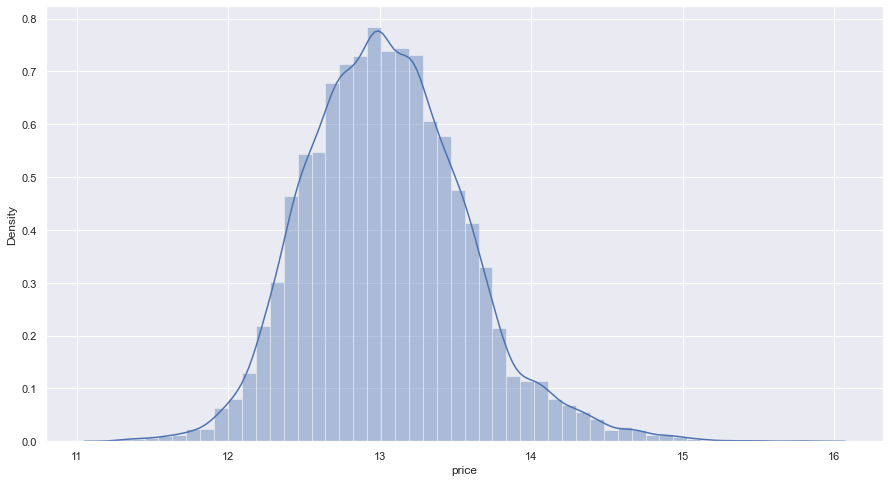

In [92]:
# distribution plot after the application of the log transformation in the target value
sns.distplot(df1['price'])
# seems like a beautiful normal distribution

In [93]:
# let's filter the outliers by price, price < 1000000
df2=df[df['price'] < 1000000]
df2

,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,sqft_living15,sqft_lot15,price,date_year
id,,,,,,,,,,,,,,,,,,
7129300520,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,1340,5650,221900,2014
6414100192,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,1690,7639,538000,2014
5631500400,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,2720,8062,180000,2015
2487200875,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,1360,5000,604000,2014
1954400510,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,1800,7503,510000,2015
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
263000018,3,2.50,1530,1131,3.0,0,0,3,8,1530,0,2009,0,98103,1530,1509,360000,2014
6600060120,4,2.50,2310,5813,2.0,0,0,3,8,2310,0,2014,0,98146,1830,7200,400000,2015
1523300141,2,0.75,1020,1350,2.0,0,0,3,7,1020,0,2009,0,98144,1020,2007,402101,2014


In [94]:
# shape of df2
df2.shape

(20107, 18)

<AxesSubplot:xlabel='price', ylabel='Density'>

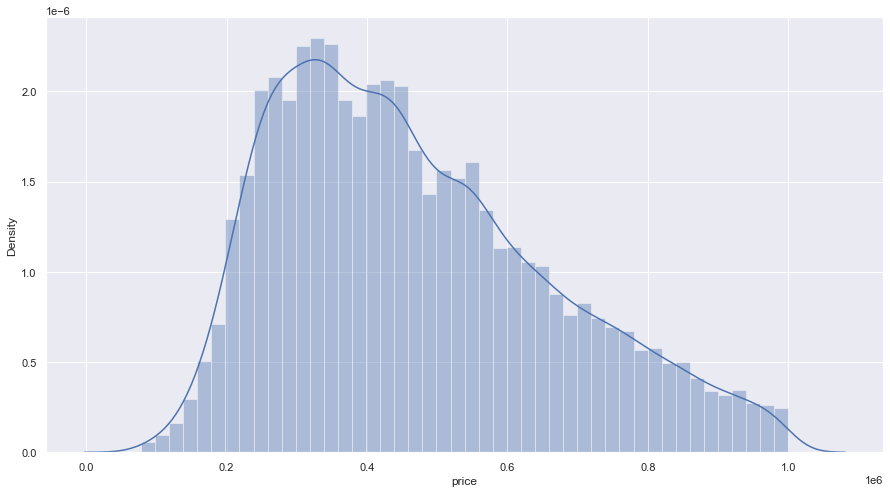

In [95]:
# distribution plot of df2
sns.distplot(df2['price'])

In [96]:
# sorting df2 correlations
df2.corr()['price'].sort_values(ascending=False)

price            1.000000
grade            0.617135
sqft_living      0.604317
sqft_living15    0.549322
sqft_above       0.515645
bathrooms        0.439785
bedrooms         0.287381
floors           0.269241
sqft_basement    0.221783
view             0.212284
sqft_lot         0.094958
sqft_lot15       0.082985
yr_renovated     0.074982
yr_built         0.060951
waterfront       0.051174
condition        0.030952
date_year        0.002248
zipcode         -0.019236
Name: price, dtype: float64

In [97]:
# filtering again and define a new dataframe price > 650000
df_outliers=df[df['price'] > 650000]
df_outliers.shape

(5205, 18)

In [98]:
# getting the numerical part of the new dataframe
df_outliers_num=df_outliers.select_dtypes(include='number')

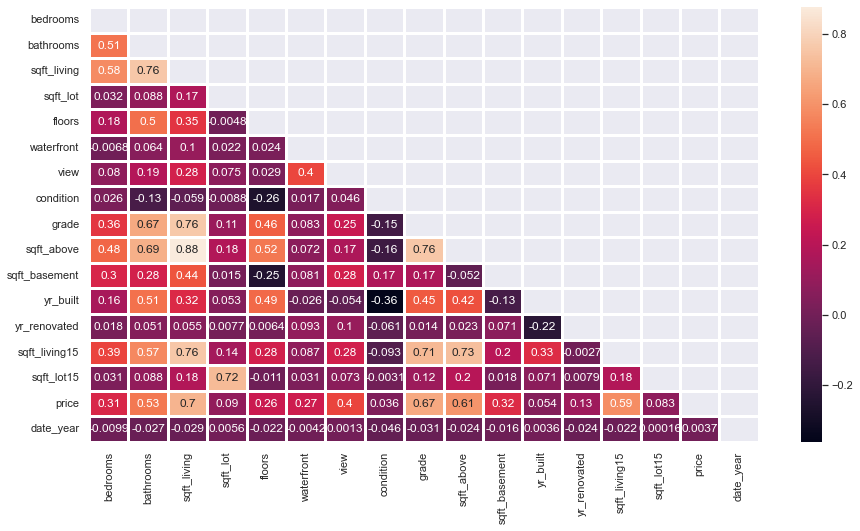

In [99]:
# getting the correlations matrix of the numerical features from the new dataframe
correlations_matrix_outliers = df_outliers_num.corr()
sns.heatmap(correlations_matrix,sns.set(rc = {'figure.figsize':(15,8)}), linecolor='white', linewidths=3, mask=mask, annot=True)
plt.show()

In [100]:
# sorting the values of the previous correlations matrix
df_outliers_num.corr()['price'].sort_values(ascending=False)

price            1.000000
sqft_living      0.606057
grade            0.504423
bathrooms        0.463602
sqft_above       0.463314
sqft_living15    0.369282
view             0.339186
waterfront       0.312399
sqft_basement    0.290405
bedrooms         0.202697
floors           0.122909
yr_renovated     0.104388
sqft_lot15       0.037170
sqft_lot         0.031003
yr_built         0.028809
date_year        0.006579
condition        0.004363
zipcode         -0.083540
Name: price, dtype: float64

In [101]:
# We can compare with the values-correlations from the first dataframe
# price            1.000000
# sqft_living      0.701917
# grade            0.667951
# sqft_above       0.605368
# sqft_living15    0.585241
# bathrooms        0.525906
# view             0.397370
# sqft_basement    0.323799
# bedrooms         0.308787
# waterfront       0.266398
# floors           0.256804
# yr_renovated     0.126424
# sqft_lot         0.089876
# sqft_lot15       0.082845
# yr_built         0.053953
# condition        0.036056
# we can notice that the feature bathrooms affects more the outliers

#### dealing with the outliers of the outliers

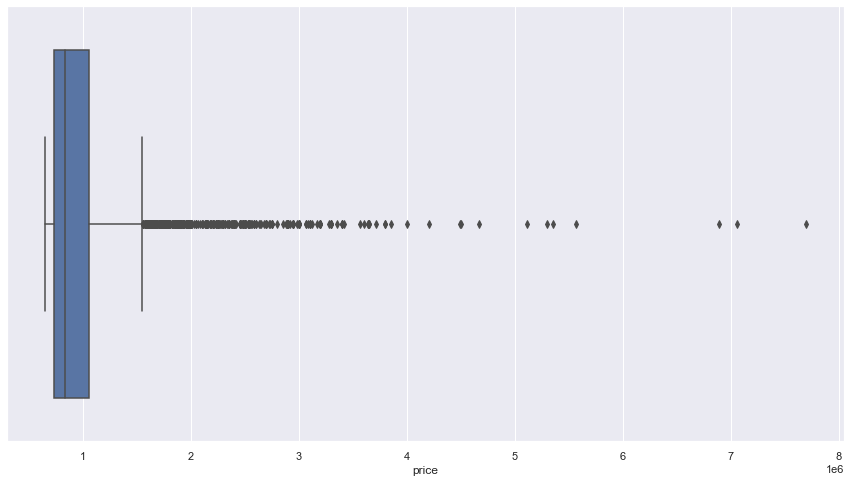

In [102]:
# checking with boxplot for the outliers of the outliers 
sns.boxplot(df_outliers_num['price'])
plt.show()

#### price range: 650K $ < house price < 2M$

In [103]:
# define a new dataframe for the outliers of the outliers. Price range 650K $ < house price < 2M $
# we strongly believe that if we drop the extreme outliers we will get a better model and better metrics
# but first let's see what happen to the outliers of the outliers
df_outliers_of_outliers=df_outliers[df_outliers['price'] < 2000000]
df_outliers_of_outliers.shape

(4997, 18)

In [104]:
# getting the numerical part
df_outliers_of_outliers_num=df_outliers_of_outliers.select_dtypes(include='number')

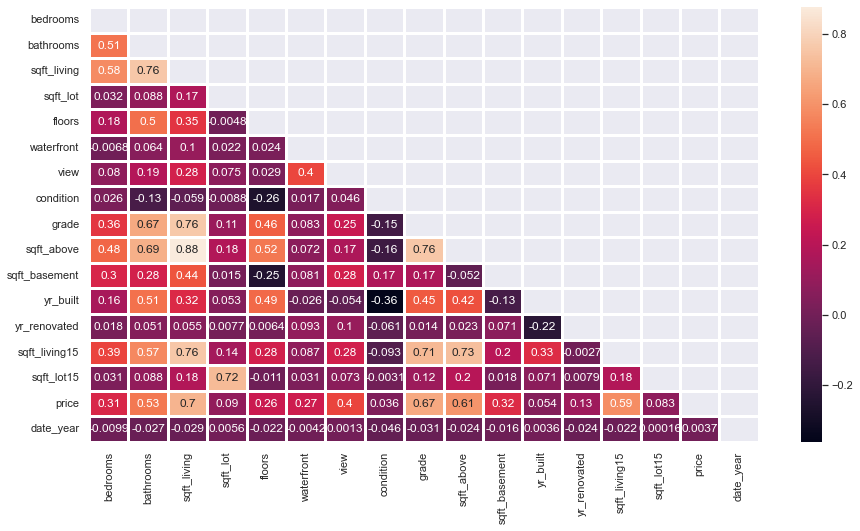

In [105]:
# getting the correlations matrix
correlations_matrix_df_outliers_of_outliers = df_outliers_of_outliers_num.corr()
sns.heatmap(correlations_matrix,sns.set(rc = {'figure.figsize':(15,8)}), linecolor='white', linewidths=3, mask=mask, annot=True)
plt.show()

In [106]:
# sorting the values of the correlations matrix by the target-price
df_outliers_of_outliers.corr()['price'].sort_values(ascending=False)

price            1.000000
sqft_living      0.494340
grade            0.467389
bathrooms        0.376433
sqft_above       0.365327
sqft_living15    0.346418
view             0.278378
sqft_basement    0.207498
bedrooms         0.177789
waterfront       0.165931
floors           0.125958
yr_renovated     0.100184
yr_built         0.043430
sqft_lot15       0.039521
sqft_lot         0.036875
date_year        0.014588
condition       -0.001531
zipcode         -0.085577
Name: price, dtype: float64

In [107]:
# We can compare with the values-correlations from the first dataframe
# price            1.000000
# sqft_living      0.701917
# grade            0.667951
# sqft_above       0.605368
# sqft_living15    0.585241
# bathrooms        0.525906
# view             0.397370
# sqft_basement    0.323799
# bedrooms         0.308787
# waterfront       0.266398
# floors           0.256804
# yr_renovated     0.126424
# sqft_lot         0.089876
# sqft_lot15       0.082845
# yr_built         0.053953
# condition        0.036056
# again we can notice that the feature bathrooms affects more the outliers of the outliers
# we also have lower correlations because the sample was smaller so we do not have a representative sample

In [108]:
# X-y split
y_out = df_outliers_of_outliers['price']
X_out = df_outliers_of_outliers.drop('price', axis=1)

In [109]:
# train-test_split
from sklearn.model_selection import train_test_split
X_train_out, X_test_out, y_train_out, y_test_out = train_test_split(X_out, y_out, test_size=0.2, random_state=42)

In [110]:
# from the numerical data we get the subset of the trained data or from the trained data we get the subset of the numerical data
X_train_out_num = X_train_out.select_dtypes(include='number')
X_train_out_num.head(2)

,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,sqft_living15,sqft_lot15,date_year
id,,,,,,,,,,,,,,,,,
2919200440,4,2.5,1860,3840,1.5,0,0,3,7,1170,690,1928,2014,98117,1400,3840,2015
824059324,4,3.5,3720,8301,2.0,0,0,3,10,2880,840,2008,0,98004,2080,9676,2015


In [111]:
# we drop the column zipcode as we have already converted it to categorical
X_train_out_num = X_train_out_num.drop('zipcode', axis=1)
X_train_out_num.head(2)

,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,sqft_living15,sqft_lot15,date_year
id,,,,,,,,,,,,,,,,
2919200440,4,2.5,1860,3840,1.5,0,0,3,7,1170,690,1928,2014,1400,3840,2015
824059324,4,3.5,3720,8301,2.0,0,0,3,10,2880,840,2008,0,2080,9676,2015


In [112]:
# from the categorical data we get the subset of the trained data or from the trained data we get the subset of the categorical data
X_train_out_cat = X_train_out[['zipcode']]
X_train_out_cat.head(2)

,zipcode
id,
2919200440,98117
824059324,98004


In [113]:
# from the numerical data we get the subset of the test data or from the test data we get the subset of the numerical data
X_test_out_num = X_test_out.select_dtypes(include='number')
X_test_out_num.head(2)

,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,sqft_living15,sqft_lot15,date_year
id,,,,,,,,,,,,,,,,,
8651600160,4,2.25,2510,11585,2.0,0,0,4,8,2510,0,1969,0,98040,2450,9691,2014
1564000410,4,2.50,3440,6332,2.0,0,0,3,10,3440,0,2001,0,98059,3310,6528,2015


In [114]:
# we drop the column zipcode as we have already converted it to categorical
X_test_out_num = X_test_out_num.drop('zipcode', axis=1)
X_test_out_num.head(2)

,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,sqft_living15,sqft_lot15,date_year
id,,,,,,,,,,,,,,,,
8651600160,4,2.25,2510,11585,2.0,0,0,4,8,2510,0,1969,0,2450,9691,2014
1564000410,4,2.50,3440,6332,2.0,0,0,3,10,3440,0,2001,0,3310,6528,2015


In [115]:
# from the categorical data we get the subset of the test data or from the test data we get the subset of the categorical data
X_test_out_cat = X_test_out[['zipcode']]
X_test_out_cat.head(2)

,zipcode
id,
8651600160,98040
1564000410,98059


In [116]:
# Let's use One Hot/Label Encoding for the categorical feature-Feature Engineering
encoder = OneHotEncoder(drop='first').fit(X_train_out_cat)
encoded_out_train = encoder.transform(X_train_out_cat).toarray()
cols = encoder.get_feature_names(input_features=X_train_out_cat.columns)
onehot_encoded_train_out = pd.DataFrame(encoded_out_train, columns=cols)
onehot_encoded_train_out.head(2)

,zipcode_98003,zipcode_98004,zipcode_98005,zipcode_98006,zipcode_98007,zipcode_98008,zipcode_98010,zipcode_98011,zipcode_98014,zipcode_98019,...,zipcode_98136,zipcode_98144,zipcode_98146,zipcode_98155,zipcode_98166,zipcode_98177,zipcode_98178,zipcode_98188,zipcode_98198,zipcode_98199
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [117]:
# Min-max scaler for X_train_out_num
# For each column, each value in the column is subtracted by the max of the column 
# and then divided by the difference of max and min of the column. Data range from 0 - 1, instead of min to max
# It is very sensitive to the presence of outliers.
MinMaxtransformer = MinMaxScaler().fit(X_train_out_num)
x_train_out_norm = MinMaxtransformer.transform(X_train_out_num)
print(x_train_out_norm.shape)
x_train_out_norm = pd.DataFrame(x_train_out_norm,columns=X_train_out_num.columns)
x_train_out_norm.head(2)

(3997, 16)


,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,sqft_living15,sqft_lot15,date_year
0,0.333333,0.291667,0.144131,0.002011,0.25,0.0,0.0,0.5,0.250,0.087537,0.211656,0.243478,0.999504,0.109533,0.003290,1.0
1,0.333333,0.458333,0.420505,0.004713,0.50,0.0,0.0,0.5,0.625,0.341246,0.257669,0.939130,0.000000,0.247465,0.009996,1.0


In [118]:
# concatenating DataFrames
X_train_out_concat = pd.concat([x_train_out_norm, onehot_encoded_train_out], axis=1)
X_train_out_concat.head()

,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,...,zipcode_98136,zipcode_98144,zipcode_98146,zipcode_98155,zipcode_98166,zipcode_98177,zipcode_98178,zipcode_98188,zipcode_98198,zipcode_98199
0,0.333333,0.291667,0.144131,0.002011,0.25,0.0,0.00,0.50,0.250,0.087537,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.333333,0.458333,0.420505,0.004713,0.50,0.0,0.00,0.50,0.625,0.341246,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.222222,0.208333,0.148588,0.003695,0.00,0.0,0.75,0.75,0.375,0.194362,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.444444,0.333333,0.315007,0.002665,0.50,0.0,0.00,0.50,0.500,0.360534,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.222222,0.375000,0.160475,0.012392,0.50,1.0,0.75,0.75,0.500,0.176558,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [119]:
# Min-max scaler for X_test_out_num
# For each column, each value in the column is subtracted by the max of the column 
# and then divided by the difference of max and min of the column. Data range from 0 - 1, instead of min to max
# It is very sensitive to the presence of outliers.
# without fit for test
x_test_out_norm = MinMaxtransformer.transform(X_test_out_num)
print(x_test_out_norm.shape)
x_test_out_norm = pd.DataFrame(x_test_out_norm,columns=X_test_out_num.columns)
x_test_out_norm.head(2)

(1000, 16)


,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,sqft_living15,sqft_lot15,date_year
0,0.333333,0.250000,0.240713,0.006703,0.5,0.0,0.0,0.75,0.375,0.286350,0.0,0.600000,0.0,0.322515,0.010014,0.0
1,0.333333,0.291667,0.378900,0.003521,0.5,0.0,0.0,0.50,0.625,0.424332,0.0,0.878261,0.0,0.496957,0.006379,1.0


In [120]:
# encoding X_test_out_cat
encoded_out_test = encoder.transform(X_test_out_cat).toarray()
cols = encoder.get_feature_names(input_features=X_test_out_cat.columns)
onehot_encoded_test_out = pd.DataFrame(encoded_out_test, columns=cols)
onehot_encoded_test_out.head(2)

,zipcode_98003,zipcode_98004,zipcode_98005,zipcode_98006,zipcode_98007,zipcode_98008,zipcode_98010,zipcode_98011,zipcode_98014,zipcode_98019,...,zipcode_98136,zipcode_98144,zipcode_98146,zipcode_98155,zipcode_98166,zipcode_98177,zipcode_98178,zipcode_98188,zipcode_98198,zipcode_98199
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [121]:
# concatenating DataFrames
X_test_out_concat = pd.concat([x_test_out_norm, onehot_encoded_test_out], axis=1)
X_test_out_concat.head(2)

,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,...,zipcode_98136,zipcode_98144,zipcode_98146,zipcode_98155,zipcode_98166,zipcode_98177,zipcode_98178,zipcode_98188,zipcode_98198,zipcode_98199
0,0.333333,0.250000,0.240713,0.006703,0.5,0.0,0.0,0.75,0.375,0.286350,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.333333,0.291667,0.378900,0.003521,0.5,0.0,0.0,0.50,0.625,0.424332,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [122]:
# Apply linear regression. Fit the model in Supervised learning. 
# Assume a linear relationship between 𝑦 and 𝐱: 𝑦 = 𝛽₀ + 𝛽₁𝑥₁ + ⋯ + 𝛽ᵣ𝑥ᵣ + 𝜀
model_train_out = LinearRegression()
model_train_out.fit(X_train_out_concat, y_train_out)

LinearRegression()

In [123]:
# Let's find the R2 score (Coefficient of determination) 
# The coefficient of determination, denoted as 𝑅², tells you which amount of variation in 𝑦 can be explained
# by the dependence on 𝐱 using the particular regression model. 
# Larger 𝑅² indicates a better fit and means that the model can better explain the variation of the output with different inputs.
from sklearn.metrics import r2_score
predictions_out = model_train_out.predict(X_test_out_concat)
r2_score(y_test_out, predictions_out) # or model.score(X1_test, y_test) An unbiased estimation of the predictive performance of your model is based on test data

0.6915223672543507

In [124]:
# we might have lower r2 score because of less train observations, so the sample is not representative 

In [125]:
# MSE (Mean Squared Error) represents the difference between the original and predicted values extracted
# by squared the average difference over the data set.
mean_squared_error(y_test_out, predictions_out, squared=False)

156301.2011245435

In [126]:
# RMSE (Root Mean Squared Error) is the error rate by the square root of MSE.
math.sqrt(mean_squared_error(y_test_out, predictions_out, squared=False))

395.3494670851897

In [127]:
# MAE (Mean absolute error) represents the difference between the original and predicted values extracted 
#by averaged the absolute difference over the data set.
mean_absolute_error(y_test_out, predictions_out)

116332.085

In [128]:
# all of them
print('r2 score is: ', r2_score(y_test_out, predictions_out),', RMSE is: ', math.sqrt(mean_squared_error(y_test_out, predictions_out, squared=False)), ', MAE is: ', mean_absolute_error(y_test_out, predictions_out),'and MSE is: ', mean_squared_error(y_test_out, predictions_out, squared=False))

r2 score is:  0.6915223672543507 , RMSE is:  395.3494670851897 , MAE is:  116332.085 and MSE is:  156301.2011245435


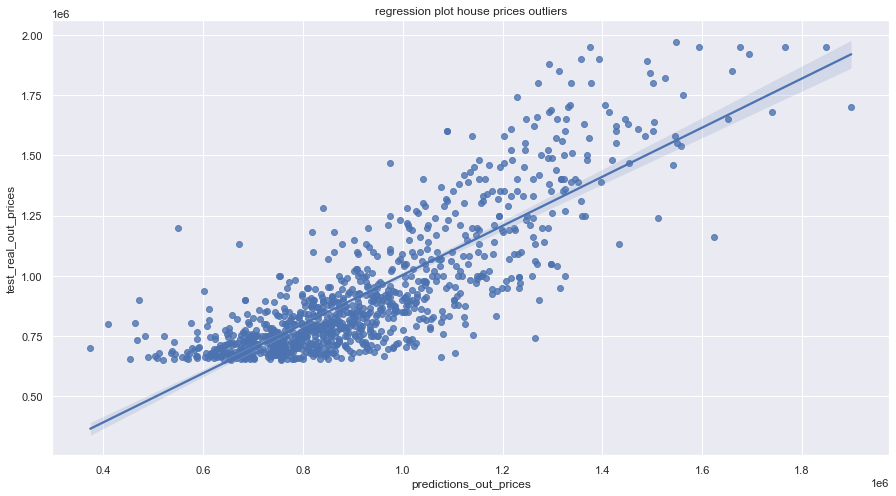

In [129]:
# regression plot between predictions_out and test_real_out_prices
sns.regplot(x=predictions_out, y=y_test_out)
plt.xlabel('predictions_out_prices')
plt.ylabel('test_real_out_prices')
plt.title('regression plot house prices outliers');

#### looking for r2 score for observations <2000000 in order to improve our model

In [130]:
# creating a new dataframe without the outliers of the outliers (without extreme outliers), price < 2000000
df_less_2M=df[df['price'] < 2000000]
df_less_2M

,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,sqft_living15,sqft_lot15,price,date_year
id,,,,,,,,,,,,,,,,,,
7129300520,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,1340,5650,221900,2014
6414100192,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,1690,7639,538000,2014
5631500400,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,2720,8062,180000,2015
2487200875,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,1360,5000,604000,2014
1954400510,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,1800,7503,510000,2015
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
263000018,3,2.50,1530,1131,3.0,0,0,3,8,1530,0,2009,0,98103,1530,1509,360000,2014
6600060120,4,2.50,2310,5813,2.0,0,0,3,8,2310,0,2014,0,98146,1830,7200,400000,2015
1523300141,2,0.75,1020,1350,2.0,0,0,3,7,1020,0,2009,0,98144,1020,2007,402101,2014


In [131]:
# getting the numerical part
df_less_2M_num=df_less_2M.select_dtypes(include='number')

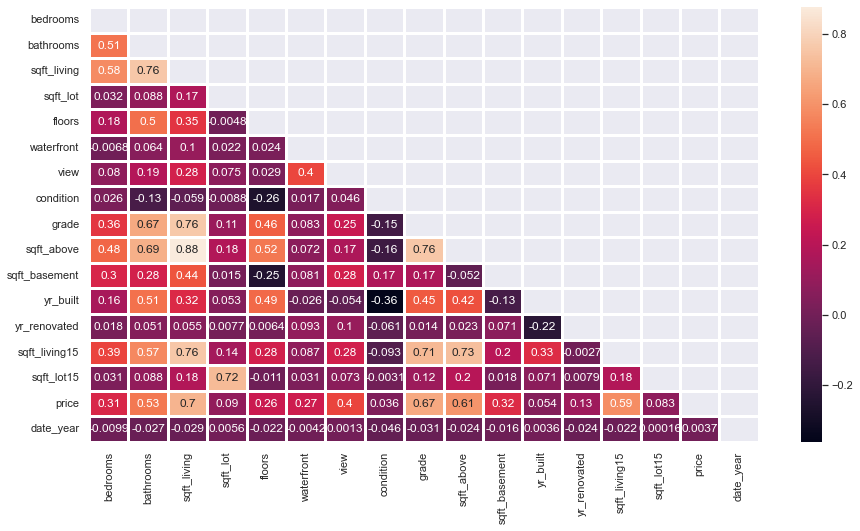

In [132]:
# getting the correlations matrix
correlations_matrix_df_less_2M_num = df_less_2M_num.corr()
sns.heatmap(correlations_matrix,sns.set(rc = {'figure.figsize':(15,8)}), linecolor='white', linewidths=3, mask=mask, annot=True)
plt.show()

In [133]:
# sorting the values of the correlations matrix by the target-price
df_less_2M_num.corr()['price'].sort_values(ascending=False)

price            1.000000
grade            0.680880
sqft_living      0.679490
sqft_living15    0.601513
sqft_above       0.584374
bathrooms        0.508470
view             0.344275
bedrooms         0.316763
sqft_basement    0.285650
floors           0.278638
waterfront       0.142752
yr_renovated     0.118748
sqft_lot         0.098013
sqft_lot15       0.088028
yr_built         0.063376
condition        0.037310
date_year        0.005184
zipcode         -0.046909
Name: price, dtype: float64

In [134]:
# We can compare with the values-correlations from the first dataframe
# price            1.000000
# sqft_living      0.701917
# grade            0.667951
# sqft_above       0.605368
# sqft_living15    0.585241
# bathrooms        0.525906
# view             0.397370
# sqft_basement    0.323799
# bedrooms         0.308787
# waterfront       0.266398
# floors           0.256804
# yr_renovated     0.126424
# sqft_lot         0.089876
# sqft_lot15       0.082845
# yr_built         0.053953
# condition        0.036056

In [135]:
# we can notice that the grade is more important in df_less_2M_num dataframe,
# also floors is more important in df_less_2M_num dataframe

In [136]:
# X-y split
y_2M = df_less_2M['price']
X_2M = df_less_2M.drop('price', axis=1)

In [137]:
# train-test_split
X_train_2M, X_test_2M, y_train_2M, y_test_2M = train_test_split(X_2M, y_2M, test_size=0.2, random_state=42)

In [138]:
# from the numerical data we get the subset of the trained data or from the trained data we get the subset of the numerical data
X_train_2M_num = X_train_2M.select_dtypes(include='number')
X_train_2M_num.head(2)

,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,sqft_living15,sqft_lot15,date_year
id,,,,,,,,,,,,,,,,,
1324300380,3,1.0,1600,5000,1.5,0,0,3,7,1110,490,1947,0,98107,1380,5000,2014
8078440050,4,2.5,2340,8248,2.0,0,0,3,8,2340,0,1989,0,98074,2140,9963,2014


In [139]:
# we drop the column zipcode as we have already converted it to categorical
X_train_2M_num = X_train_2M_num.drop('zipcode', axis=1)
X_train_2M_num.head(2)

,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,sqft_living15,sqft_lot15,date_year
id,,,,,,,,,,,,,,,,
1324300380,3,1.0,1600,5000,1.5,0,0,3,7,1110,490,1947,0,1380,5000,2014
8078440050,4,2.5,2340,8248,2.0,0,0,3,8,2340,0,1989,0,2140,9963,2014


In [140]:
# from the categorical data we get the subset of the trained data or from the trained data we get the subset of the categorical data
X_train_2M_cat = X_train_2M[['zipcode']]
X_train_2M_cat.head(2)

,zipcode
id,
1324300380,98107
8078440050,98074


In [141]:
# from the numerical data we get the subset of the test data or from the test data we get the subset of the numerical data
X_test_2M_num = X_test_2M.select_dtypes(include='number')
X_test_2M_num.head(2)

,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,sqft_living15,sqft_lot15,date_year
id,,,,,,,,,,,,,,,,,
9407111220,2,1.00,1020,9200,1.0,0,0,3,7,1020,0,1978,0,98045,1520,9600,2015
1336800185,3,2.75,2500,5568,2.0,0,0,5,9,2500,0,1905,0,98112,2810,5568,2014


In [142]:
# we drop the column zipcode as we have already converted it to categorical
X_test_2M_num = X_test_2M_num.drop('zipcode', axis=1)
X_test_2M_num.head(2)

,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,sqft_living15,sqft_lot15,date_year
id,,,,,,,,,,,,,,,,
9407111220,2,1.00,1020,9200,1.0,0,0,3,7,1020,0,1978,0,1520,9600,2015
1336800185,3,2.75,2500,5568,2.0,0,0,5,9,2500,0,1905,0,2810,5568,2014


In [143]:
# from the categorical data we get the subset of the test data or from the test data we get the subset of the categorical data
X_test_2M_cat = X_test_2M[['zipcode']]
X_test_2M_cat.head(2)

,zipcode
id,
9407111220,98045
1336800185,98112


In [144]:
# Let's use One Hot/Label Encoding for the categorical feature-Feature Engineering
encoder = OneHotEncoder(drop='first').fit(X_train_2M_cat)
encoded_2M_train = encoder.transform(X_train_2M_cat).toarray()
cols = encoder.get_feature_names(input_features=X_train_2M_cat.columns)
onehot_encoded_train_2M = pd.DataFrame(encoded_2M_train, columns=cols)
onehot_encoded_train_2M.head(2)

,zipcode_98002,zipcode_98003,zipcode_98004,zipcode_98005,zipcode_98006,zipcode_98007,zipcode_98008,zipcode_98010,zipcode_98011,zipcode_98014,...,zipcode_98146,zipcode_98148,zipcode_98155,zipcode_98166,zipcode_98168,zipcode_98177,zipcode_98178,zipcode_98188,zipcode_98198,zipcode_98199
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [145]:
# Min-max scaler for X_train_2M_num-Feature Engineering
# For each column, each value in the column is subtracted by the max of the column 
# and then divided by the difference of max and min of the column. Data range from 0 - 1, instead of min to max
# It is very sensitive to the presence of outliers.
MinMaxtransformer = MinMaxScaler().fit(X_train_2M_num)
x_train_2M_norm = MinMaxtransformer.transform(X_train_2M_num)
print(x_train_2M_norm.shape)
x_train_2M_norm = pd.DataFrame(x_train_2M_norm,columns=X_train_2M_num.columns)
x_train_2M_norm.head(2)

(17111, 16)


,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,sqft_living15,sqft_lot15,date_year
0,0.06250,0.071429,0.167120,0.002714,0.2,0.0,0.0,0.5,0.4,0.104965,0.17193,0.408696,0.0,0.172608,0.004996,0.0
1,0.09375,0.285714,0.267663,0.004681,0.4,0.0,0.0,0.5,0.5,0.279433,0.00000,0.773913,0.0,0.315197,0.010697,0.0


In [146]:
# concatenating DataFrames
X_train_2M_concat = pd.concat([x_train_2M_norm, onehot_encoded_train_2M], axis=1)
X_train_2M_concat.head(2)

,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,...,zipcode_98146,zipcode_98148,zipcode_98155,zipcode_98166,zipcode_98168,zipcode_98177,zipcode_98178,zipcode_98188,zipcode_98198,zipcode_98199
0,0.06250,0.071429,0.167120,0.002714,0.2,0.0,0.0,0.5,0.4,0.104965,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.09375,0.285714,0.267663,0.004681,0.4,0.0,0.0,0.5,0.5,0.279433,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [147]:
# Min-max scaler for X_test_2M_num
# For each column, each value in the column is subtracted by the max of the column 
# and then divided by the difference of max and min of the column. Data range from 0 - 1, instead of min to max
# It is very sensitive to the presence of outliers.
# without fit for test
x_test_2M_norm = MinMaxtransformer.transform(X_test_2M_num) # check "transform"
print(x_test_2M_norm.shape)
x_test_2M_norm = pd.DataFrame(x_test_2M_norm,columns=X_test_2M_num.columns)
x_test_2M_norm.head(2)

(4278, 16)


,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,sqft_living15,sqft_lot15,date_year
0,0.03125,0.071429,0.088315,0.005258,0.0,0.0,0.0,0.5,0.4,0.092199,0.0,0.678261,0.0,0.198874,0.010280,1.0
1,0.06250,0.321429,0.289402,0.003058,0.4,0.0,0.0,1.0,0.6,0.302128,0.0,0.043478,0.0,0.440901,0.005648,0.0


In [148]:
# One Hot/Label Encoding for the categorical feature
encoded_2M_test = encoder.transform(X_test_2M_cat).toarray()
cols = encoder.get_feature_names(input_features=X_test_2M_cat.columns)
onehot_encoded_test_2M = pd.DataFrame(encoded_2M_test, columns=cols)
onehot_encoded_test_2M.head(2)

,zipcode_98002,zipcode_98003,zipcode_98004,zipcode_98005,zipcode_98006,zipcode_98007,zipcode_98008,zipcode_98010,zipcode_98011,zipcode_98014,...,zipcode_98146,zipcode_98148,zipcode_98155,zipcode_98166,zipcode_98168,zipcode_98177,zipcode_98178,zipcode_98188,zipcode_98198,zipcode_98199
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [149]:
# concatenating DataFrames
X_test_2M_concat = pd.concat([x_test_2M_norm, onehot_encoded_test_2M], axis=1)
X_test_2M_concat.head(2)

,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,...,zipcode_98146,zipcode_98148,zipcode_98155,zipcode_98166,zipcode_98168,zipcode_98177,zipcode_98178,zipcode_98188,zipcode_98198,zipcode_98199
0,0.03125,0.071429,0.088315,0.005258,0.0,0.0,0.0,0.5,0.4,0.092199,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.06250,0.321429,0.289402,0.003058,0.4,0.0,0.0,1.0,0.6,0.302128,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [150]:
# Apply linear regression. Fit the model in Supervised learning. 
# Assume a linear relationship between 𝑦 and 𝐱: 𝑦 = 𝛽₀ + 𝛽₁𝑥₁ + ⋯ + 𝛽ᵣ𝑥ᵣ + 𝜀
model_train_2M = LinearRegression()
model_train_2M.fit(X_train_2M_concat, y_train_2M)

LinearRegression()

In [151]:
# Let's find the R2 score (Coefficient of determination) 
# The coefficient of determination, denoted as 𝑅², tells you which amount of variation in 𝑦 can be explained
# by the dependence on 𝐱 using the particular regression model. 
# Larger 𝑅² indicates a better fit and means that the model can better explain the variation of the output with different inputs.
from sklearn.metrics import r2_score
predictions_2M = model_train_2M.predict(X_test_2M_concat)
r2_score(y_test_2M, predictions_2M)
# much better r2 score, this model gives us the best result and best fits our data

0.8326233684952015

In [152]:
df_less_2M.shape

(21389, 18)

In [153]:
# this model seems to be more accurate and we also have a lot of observations 21389 instead of 21597 from the whole data,
# it is better to drop the outliers of the outliers from the whole dataframe 
# and keep only observations < 2000000
# by dropping only 21597-21389=208 observations we have now much better r2 score and the sample is representative as well
# or by dropping 208/21597=0,00963 , 0,9% of the extreme observations we get r2 score almost 5% better 

In [154]:
# MSE (Mean Squared Error) represents the difference between the original and predicted values extracted
# by squared the average difference over the data set.
mean_squared_error(y_test_2M, predictions_2M, squared=False)

119109.44827605927

In [155]:
# RMSE (Root Mean Squared Error) is the error rate by the square root of MSE.
math.sqrt(mean_squared_error(y_test_2M, predictions_2M, squared=False))

345.1223671048564

In [156]:
# MAE (Mean absolute error) represents the difference between the original and predicted values extracted 
#by averaged the absolute difference over the data set.
mean_absolute_error(y_test_2M, predictions_2M)

80402.47454763232

In [157]:
# all of them
print('r2 score is: ', r2_score(y_test_2M, predictions_2M),', RMSE is: ', math.sqrt(mean_squared_error(y_test_2M, predictions_2M, squared=False)), ', MAE is: ', mean_absolute_error(y_test_2M, predictions_2M),'and MSE is: ', mean_squared_error(y_test_2M, predictions_2M, squared=False))

r2 score is:  0.8326233684952015 , RMSE is:  345.1223671048564 , MAE is:  80402.47454763232 and MSE is:  119109.44827605927


In [158]:
# bias 𝑏₀
print('intercept:', model_train_2M.intercept_)

intercept: -243789.43907427968


In [159]:
# array containing 𝑏₁, 𝑏₂, ... respectively
print('slope:', model_train_2M.coef_)

slope: [-3.53872566e+05  1.17282346e+05  1.99082470e+17  4.73707353e+05
 -6.80086102e+04  3.44772916e+05  1.92265091e+05  1.08095488e+05
  5.58226680e+05 -1.90697203e+17 -7.70903587e+16 -5.80800000e+04
  4.82660000e+04  1.76168000e+05 -8.67500000e+04  2.71040000e+04
  2.66360000e+04 -1.21560000e+04  6.75574000e+05  3.39753750e+05
  2.76796000e+05  2.47397000e+05  2.45208000e+05  7.83612500e+04
  1.37993500e+05  1.13000000e+05  9.55970000e+04 -1.19090000e+04
 -2.32240000e+04  1.65261625e+05  1.76116000e+05  1.31092000e+05
  2.17794000e+05  5.40800000e+03  1.63720000e+04  1.01145000e+04
  3.57942000e+05  1.96411000e+05  3.39800000e+04  9.38065000e+05
  4.81222000e+05  2.11500000e+03  9.76155000e+04  2.39304000e+05
  2.21508000e+05  4.56960000e+04  1.00388000e+05  3.35990000e+04
  9.74845000e+04  1.00586000e+05  6.46120000e+04  1.61504000e+05
  1.96592000e+05  1.96528000e+05  1.52036000e+05 -3.33880000e+04
  4.49663500e+05  3.41636000e+05  4.60281500e+05  1.41540000e+05
  3.30647000e+05  

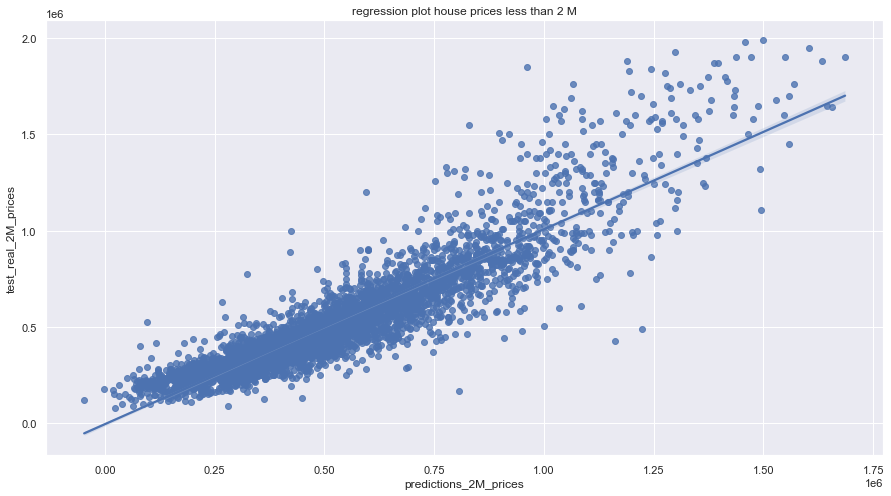

In [160]:
# regression plot between predictions_2M and test_real_2M_prices
sns.regplot(x=predictions_2M, y=y_test_2M)
plt.xlabel('predictions_2M_prices')
plt.ylabel('test_real_2M_prices')
plt.title('regression plot house prices less than 2 M');

#### Reporting-Present results

In [161]:
# we can notice that this model best fits our data and every observation is closer to the line,
# so the metrics of the linear regression is much better when we drop the outliers of the outliers 

In [162]:
# In this Notebook we present the results of analyzing data from the data of a real estate company.
# The problem was given and we tried to understand the problem and the goal by Data description.
# After getting the data from an excel file and importing useful libraries, we did not have something for data cleaning. 
# Next step was to continue the Exploratory Data Analysis(EDA) by using some plots or finding some interesting results
# such as 'describe the dataframe' in order to understand better the features.
# We deal with useless columns-converting column zipcode to categorical, drop some columns and convert column id to an index. 
# We also played with the data and found with filtering some opportunities of houses with good characteristics and low prices.
# We seperated the columns in two categories (numerical and categorical) and we treated the two categories, differently.
# The numerical part was separated in continuous and discrete numeric data.
# From heatmap and correlations matrix we checked the multicollinearity between the features and for every pair, their correlation
# Then we defined that the column price is the target Y variable.
# We plotted some useful scatterplots with our target column and the high correlated features and we checked for potential trends
# We used three different datasets and we compared the results
# First dataset-model: Using the whole data (including outliers). Price range: whole price range
# Second dataset-model: Using the data of the houses that are most expensive than 650K$ and less than 2M$.
# Price range: 650K $ < house price < 2M $
# Third dataset-model: Using the whole data (without extreme outliers-outliers of the outliers). 
# Price range: houses cheaper than 2M $
# In General, we followed the following process 
# X-y split, train-test split
# Encoding the categorical feature-zipcode
# Using Min-max scaler for the X trained numerical data
# Concatenating the dataframes of the normalized trained numerical and encoded (trained) categorical-zipcode 
# Apply linear regression to the trained data. Fit the model in Supervised learning.  Assume a linear relationship between 𝑦 
# and 𝐱: 𝑦 = 𝛽₀ + 𝛽₁𝑥₁ + ⋯ + 𝛽ᵣ𝑥ᵣ + 𝜀
# We made the same process for the test subset.
# For the first model we also used KNN-K Nearest Neighbors and StandardScaler but we found less r2 scores in both cases 
# We continued with Model Validation for every case. We found different R2 scores for each approach.
# We got the best R2 score in our 3rd model-Using the whole data (without extreme outliers), observations smaller than 2 M $ 
# In this case R2 score was 0.83040, very close to 1.
# So, by dropping only 21597-21389=208 observations we have much better r2 score and the sample is representative as well
# or by dropping 208/21597=0,00963 , 0,9% of the extreme observations we get r2 score almost 4-5% better 
# The coefficient of determination, denoted as 𝑅², tells us which amount of variation in 𝑦 can be explained
# by the dependence on 𝐱 using the particular regression model. 
# Larger 𝑅² indicates a better fit and means that the model can better explain the variation of the output with different inputs.
# We found for each case the MSE (Mean Squared Error) which represents the difference between the original and predicted values extracted
# by squared the average difference over the data set and the 
# RMSE (Root Mean Squared Error), is the error rate by the square root of MSE.
# Last we calculated MAE (Mean absolute error), which represents the difference between the original and predicted values extracted 
# by averaged the absolute difference over the data set.
# For improving the regression model we used different techniques like MinMax scaling as feature engineering
# and dropping the extreme outliers 
# (we have a lot of outliers at high prices, especially between 75 percentile and the maximum price).
# We might have better results if we used other transformations like Box Cox Transformation or log.
# From our results we know that 83,04% of variation in 𝑦 can be explained by the dependence on 𝐱 using the particular regression model
# We faced difficulties to predict the prices of the houses, which are more expensive than 650K $ because
# We have a very wide price range (approximately from 650 K-8 M) – there are extreme outliers
# and there are very few houses in that price range-no representative sample 
# So we have better results after dropping outliers (smaller price range) and
# better results using all the houses cheaper than 2M $ (large amount of houses-representative)
# We discovered that some features like feature bathrooms affects more the outliers according to the correlations matrix
# We could also try more technics in our models for improving it, for instance:
# Dropping some features with low correlation to target column
# Dropping some features, which cause multicollinearity
# Scaling with different methods (for example box cox transformation)
# Using a, b tests
# In any case with our best approach we got a very good r2 score and we noticed some trends in the real estate market.

In [163]:
# END